In [1]:
#Import necessary packages

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Load data and check for columns

raw_df = pd.read_csv('Data_Cortex_Nuclear.csv')
print(raw_df.columns)

Index(['MouseID', 'DYRK1A_N', 'ITSN1_N', 'BDNF_N', 'NR1_N', 'NR2A_N', 'pAKT_N',
       'pBRAF_N', 'pCAMKII_N', 'pCREB_N', 'pELK_N', 'pERK_N', 'pJNK_N',
       'PKCA_N', 'pMEK_N', 'pNR1_N', 'pNR2A_N', 'pNR2B_N', 'pPKCAB_N',
       'pRSK_N', 'AKT_N', 'BRAF_N', 'CAMKII_N', 'CREB_N', 'ELK_N', 'ERK_N',
       'GSK3B_N', 'JNK_N', 'MEK_N', 'TRKA_N', 'RSK_N', 'APP_N', 'Bcatenin_N',
       'SOD1_N', 'MTOR_N', 'P38_N', 'pMTOR_N', 'DSCR1_N', 'AMPKA_N', 'NR2B_N',
       'pNUMB_N', 'RAPTOR_N', 'TIAM1_N', 'pP70S6_N', 'NUMB_N', 'P70S6_N',
       'pGSK3B_N', 'pPKCG_N', 'CDK5_N', 'S6_N', 'ADARB1_N', 'AcetylH3K9_N',
       'RRP1_N', 'BAX_N', 'ARC_N', 'ERBB4_N', 'nNOS_N', 'Tau_N', 'GFAP_N',
       'GluR3_N', 'GluR4_N', 'IL1B_N', 'P3525_N', 'pCASP9_N', 'PSD95_N',
       'SNCA_N', 'Ubiquitin_N', 'pGSK3B_Tyr216_N', 'SHH_N', 'BAD_N', 'BCL2_N',
       'pS6_N', 'pCFOS_N', 'SYP_N', 'H3AcK18_N', 'EGR1_N', 'H3MeK4_N',
       'CaNA_N', 'Genotype', 'Treatment', 'Behavior', 'class'],
      dtype='object')


In [3]:
# To overview of the moust dataframe

raw_df.head()

MouseID  DYRK1A_N   ITSN1_N    BDNF_N     NR1_N    NR2A_N    pAKT_N  \
0   309_1  0.503644  0.747193  0.430175  2.816329  5.990152  0.218830   
1   309_2  0.514617  0.689064  0.411770  2.789514  5.685038  0.211636   
2   309_3  0.509183  0.730247  0.418309  2.687201  5.622059  0.209011   
3   309_4  0.442107  0.617076  0.358626  2.466947  4.979503  0.222886   
4   309_5  0.434940  0.617430  0.358802  2.365785  4.718679  0.213106   

    pBRAF_N  pCAMKII_N   pCREB_N  ...   pCFOS_N     SYP_N  H3AcK18_N  \
0  0.177565   2.373744  0.232224  ...  0.108336  0.427099   0.114783   
1  0.172817   2.292150  0.226972  ...  0.104315  0.441581   0.111974   
2  0.175722   2.283337  0.230247  ...  0.106219  0.435777   0.111883   
3  0.176463   2.152301  0.207004  ...  0.111262  0.391691   0.130405   
4  0.173627   2.134014  0.192158  ...  0.110694  0.434154   0.118481   

     EGR1_N  H3MeK4_N    CaNA_N  Genotype  Treatment  Behavior   class  
0  0.131790  0.128186  1.675652   Control  Memantine       C/S  c-CS-m  
1  0.135103  0.131119  1.743610   Control  Memantine       C/S  c-CS-m  
2  0.133362  0.127431  1.926427   Control  Memantine       C/S  c-CS-m  
3  0.147444  0.146901  1.700563   Control  Memantine       C/S  c-CS-m  
4  0.140314  0.148380  1.839730   Control  Memantine       C/S  c-CS-m  

[5 rows x 82 columns]

In [4]:
# Rename MouseID so its separated by mouse number and number of measurement registered

raw_df['MouseNumber'] = raw_df.MouseID.apply(lambda x: x.split('_')[0])
raw_df['MouseRegisterNo'] = raw_df.MouseID.apply(lambda x: x.split('_')[1])
raw_df.drop(['MouseID'], axis=1, inplace=True)

In [5]:

raw_df.head()

DYRK1A_N   ITSN1_N    BDNF_N     NR1_N    NR2A_N    pAKT_N   pBRAF_N  \
0  0.503644  0.747193  0.430175  2.816329  5.990152  0.218830  0.177565   
1  0.514617  0.689064  0.411770  2.789514  5.685038  0.211636  0.172817   
2  0.509183  0.730247  0.418309  2.687201  5.622059  0.209011  0.175722   
3  0.442107  0.617076  0.358626  2.466947  4.979503  0.222886  0.176463   
4  0.434940  0.617430  0.358802  2.365785  4.718679  0.213106  0.173627   

   pCAMKII_N   pCREB_N    pELK_N  ...  H3AcK18_N    EGR1_N  H3MeK4_N  \
0   2.373744  0.232224  1.750936  ...   0.114783  0.131790  0.128186   
1   2.292150  0.226972  1.596377  ...   0.111974  0.135103  0.131119   
2   2.283337  0.230247  1.561316  ...   0.111883  0.133362  0.127431   
3   2.152301  0.207004  1.595086  ...   0.130405  0.147444  0.146901   
4   2.134014  0.192158  1.504230  ...   0.118481  0.140314  0.148380   

     CaNA_N  Genotype  Treatment  Behavior   class  MouseNumber  \
0  1.675652   Control  Memantine       C/S  c-CS-m          309   
1  1.743610   Control  Memantine       C/S  c-CS-m          309   
2  1.926427   Control  Memantine       C/S  c-CS-m          309   
3  1.700563   Control  Memantine       C/S  c-CS-m          309   
4  1.839730   Control  Memantine       C/S  c-CS-m          309   

   MouseRegisterNo  
0                1  
1                2  
2                3  
3                4  
4                5  

[5 rows x 83 columns]

In [152]:
#show more rows & columns
pd.set_option('display.max_rows', 90)
pd.set_option('display.max_columns', 90)

In [153]:
#Check for size of the data, data types and general information

print(raw_df.shape)
print(raw_df.dtypes)

raw_df.describe()

(1080, 83)
DYRK1A_N           float64
ITSN1_N            float64
BDNF_N             float64
NR1_N              float64
NR2A_N             float64
pAKT_N             float64
pBRAF_N            float64
pCAMKII_N          float64
pCREB_N            float64
pELK_N             float64
pERK_N             float64
pJNK_N             float64
PKCA_N             float64
pMEK_N             float64
pNR1_N             float64
pNR2A_N            float64
pNR2B_N            float64
pPKCAB_N           float64
pRSK_N             float64
AKT_N              float64
BRAF_N             float64
CAMKII_N           float64
CREB_N             float64
ELK_N              float64
ERK_N              float64
GSK3B_N            float64
JNK_N              float64
MEK_N              float64
TRKA_N             float64
RSK_N              float64
APP_N              float64
Bcatenin_N         float64
SOD1_N             float64
MTOR_N             float64
P38_N              float64
pMTOR_N            float64
DSCR1_N          

DYRK1A_N      ITSN1_N       BDNF_N        NR1_N       NR2A_N  \
count  1080.000000  1080.000000  1080.000000  1080.000000  1080.000000   
mean      0.425565     0.616913     0.319106     2.297134     3.843159   
std       0.249058     0.251316     0.049316     0.346819     0.931918   
min       0.145327     0.245359     0.115181     1.330831     1.737540   
25%       0.288163     0.473669     0.287650     2.059152     3.160287   
50%       0.366125     0.565494     0.316703     2.295648     3.738908   
75%       0.487574     0.697500     0.348039     2.528035     4.425107   
max       2.516367     2.602662     0.497160     3.757641     8.482553   

            pAKT_N      pBRAF_N    pCAMKII_N      pCREB_N       pELK_N  \
count  1080.000000  1080.000000  1080.000000  1080.000000  1080.000000   
mean      0.233206     0.181856     3.538885     0.212614     1.428060   
std       0.041583     0.027005     1.293806     0.032551     0.466403   
min       0.063236     0.064043     1.343998     0.112812     0.429032   
25%       0.205821     0.164619     2.479861     0.190828     1.204546   
50%       0.231246     0.182472     3.329624     0.210681     1.355423   
75%       0.257225     0.197226     4.480652     0.234558     1.560931   
max       0.539050     0.317066     7.464070     0.306247     6.113347   

            pERK_N       pJNK_N       PKCA_N       pMEK_N       pNR1_N  \
count  1080.000000  1080.000000  1080.000000  1080.000000  1080.000000   
mean      0.545381     0.313519     0.317961     0.275076     0.825752   
std       0.344971     0.051906     0.052165     0.046106     0.117811   
min       0.149155     0.052110     0.191431     0.056818     0.500160   
25%       0.337486     0.281530     0.281850     0.244294     0.743594   
50%       0.443122     0.321266     0.313028     0.277463     0.820850   
75%       0.663173     0.348692     0.352272     0.303355     0.898339   
max       3.566685     0.493426     0.473992     0.458001     1.408169   

           pNR2A_N      pNR2B_N     pPKCAB_N       pRSK_N        AKT_N  \
count  1080.000000  1080.000000  1080.000000  1080.000000  1080.000000   
mean      0.726782     1.561612     1.525378     0.442954     0.682260   
std       0.187773     0.270444     0.481110     0.066610     0.127257   
min       0.281285     0.301609     0.567840     0.095942     0.064421   
25%       0.591311     1.381308     1.168648     0.404152     0.597317   
50%       0.719527     1.563239     1.368844     0.440638     0.682629   
75%       0.847276     1.748498     1.881237     0.481807     0.758909   
max       1.412750     2.723965     3.061387     0.650962     1.182175   

            BRAF_N     CAMKII_N       CREB_N        ELK_N        ERK_N  \
count  1080.000000  1080.000000  1080.000000  1080.000000  1080.000000   
mean      0.378264     0.363338     0.180509     1.175029     2.474197   
std       0.216141     0.052280     0.026336     0.333267     0.652512   
min       0.143894     0.212960     0.113636     0.497695     1.131796   
25%       0.264356     0.330887     0.161867     0.947889     1.993693   
50%       0.326414     0.360061     0.179615     1.102846     2.400824   
75%       0.412716     0.393814     0.195701     1.318167     2.870697   
max       2.133416     0.586245     0.319558     2.802948     5.198404   

           GSK3B_N        JNK_N        MEK_N       TRKA_N        RSK_N  \
count  1080.000000  1080.000000  1080.000000  1080.000000  1080.000000   
mean      1.172442     0.241648     0.272849     0.693197     0.168421   
std       0.244430     0.033854     0.040951     0.120658     0.028099   
min       0.151124     0.046298     0.147201     0.198743     0.107394   
25%       1.023321     0.220425     0.247322     0.617329     0.149639   
50%       1.158891     0.244819     0.273826     0.704874     0.166700   
75%       1.309387     0.263240     0.300476     0.774031     0.184472   
max       2.475751     0.387191     0.415408     1.001623     0.305136   

        

In [154]:
#Check for missing expression values

raw_df.isnull().sum()

DYRK1A_N           0
ITSN1_N            0
BDNF_N             0
NR1_N              0
NR2A_N             0
pAKT_N             0
pBRAF_N            0
pCAMKII_N          0
pCREB_N            0
pELK_N             0
pERK_N             0
pJNK_N             0
PKCA_N             0
pMEK_N             0
pNR1_N             0
pNR2A_N            0
pNR2B_N            0
pPKCAB_N           0
pRSK_N             0
AKT_N              0
BRAF_N             0
CAMKII_N           0
CREB_N             0
ELK_N              0
ERK_N              0
GSK3B_N            0
JNK_N              0
MEK_N              0
TRKA_N             0
RSK_N              0
APP_N              0
Bcatenin_N         0
SOD1_N             0
MTOR_N             0
P38_N              0
pMTOR_N            0
DSCR1_N            0
AMPKA_N            0
NR2B_N             0
pNUMB_N            0
RAPTOR_N           0
TIAM1_N            0
pP70S6_N           0
NUMB_N             0
P70S6_N            0
pGSK3B_N           0
pPKCG_N            0
CDK5_N       

In [155]:
#To handel null values, the mean value of same type will be used to fill in rather than eliminating the 
#entire mouse from the data

mean_mouse_values = raw_df.groupby(by=['class']).mean().reset_index()

class_value = 'class'

def fix_null_values(row, col):
    value = row[col]
    if pd.isnull(value):
        return mean_mouse_values.loc[mean_mouse_values[class_value] == row[class_value], col], True
    return value, False

In [156]:
for i, row in raw_df.iterrows():
    for col in raw_df.columns:
        row[col], fixed = fix_null_values(row, col)
    raw_df.iloc[i] = row

In [157]:
#Check if all null values are replaced

raw_df.isnull().sum()

DYRK1A_N           0
ITSN1_N            0
BDNF_N             0
NR1_N              0
NR2A_N             0
pAKT_N             0
pBRAF_N            0
pCAMKII_N          0
pCREB_N            0
pELK_N             0
pERK_N             0
pJNK_N             0
PKCA_N             0
pMEK_N             0
pNR1_N             0
pNR2A_N            0
pNR2B_N            0
pPKCAB_N           0
pRSK_N             0
AKT_N              0
BRAF_N             0
CAMKII_N           0
CREB_N             0
ELK_N              0
ERK_N              0
GSK3B_N            0
JNK_N              0
MEK_N              0
TRKA_N             0
RSK_N              0
APP_N              0
Bcatenin_N         0
SOD1_N             0
MTOR_N             0
P38_N              0
pMTOR_N            0
DSCR1_N            0
AMPKA_N            0
NR2B_N             0
pNUMB_N            0
RAPTOR_N           0
TIAM1_N            0
pP70S6_N           0
NUMB_N             0
P70S6_N            0
pGSK3B_N           0
pPKCG_N            0
CDK5_N       

In [158]:
raw_df.describe()

DYRK1A_N      ITSN1_N       BDNF_N        NR1_N       NR2A_N  \
count  1080.000000  1080.000000  1080.000000  1080.000000  1080.000000   
mean      0.425565     0.616913     0.319106     2.297134     3.843159   
std       0.249058     0.251316     0.049316     0.346819     0.931918   
min       0.145327     0.245359     0.115181     1.330831     1.737540   
25%       0.288163     0.473669     0.287650     2.059152     3.160287   
50%       0.366125     0.565494     0.316703     2.295648     3.738908   
75%       0.487574     0.697500     0.348039     2.528035     4.425107   
max       2.516367     2.602662     0.497160     3.757641     8.482553   

            pAKT_N      pBRAF_N    pCAMKII_N      pCREB_N       pELK_N  \
count  1080.000000  1080.000000  1080.000000  1080.000000  1080.000000   
mean      0.233206     0.181856     3.538885     0.212614     1.428060   
std       0.041583     0.027005     1.293806     0.032551     0.466403   
min       0.063236     0.064043     1.343998     0.112812     0.429032   
25%       0.205821     0.164619     2.479861     0.190828     1.204546   
50%       0.231246     0.182472     3.329624     0.210681     1.355423   
75%       0.257225     0.197226     4.480652     0.234558     1.560931   
max       0.539050     0.317066     7.464070     0.306247     6.113347   

            pERK_N       pJNK_N       PKCA_N       pMEK_N       pNR1_N  \
count  1080.000000  1080.000000  1080.000000  1080.000000  1080.000000   
mean      0.545381     0.313519     0.317961     0.275076     0.825752   
std       0.344971     0.051906     0.052165     0.046106     0.117811   
min       0.149155     0.052110     0.191431     0.056818     0.500160   
25%       0.337486     0.281530     0.281850     0.244294     0.743594   
50%       0.443122     0.321266     0.313028     0.277463     0.820850   
75%       0.663173     0.348692     0.352272     0.303355     0.898339   
max       3.566685     0.493426     0.473992     0.458001     1.408169   

           pNR2A_N      pNR2B_N     pPKCAB_N       pRSK_N        AKT_N  \
count  1080.000000  1080.000000  1080.000000  1080.000000  1080.000000   
mean      0.726782     1.561612     1.525378     0.442954     0.682260   
std       0.187773     0.270444     0.481110     0.066610     0.127257   
min       0.281285     0.301609     0.567840     0.095942     0.064421   
25%       0.591311     1.381308     1.168648     0.404152     0.597317   
50%       0.719527     1.563239     1.368844     0.440638     0.682629   
75%       0.847276     1.748498     1.881237     0.481807     0.758909   
max       1.412750     2.723965     3.061387     0.650962     1.182175   

            BRAF_N     CAMKII_N       CREB_N        ELK_N        ERK_N  \
count  1080.000000  1080.000000  1080.000000  1080.000000  1080.000000   
mean      0.378264     0.363338     0.180509     1.175029     2.474197   
std       0.216141     0.052280     0.026336     0.333267     0.652512   
min       0.143894     0.212960     0.113636     0.497695     1.131796   
25%       0.264356     0.330887     0.161867     0.947889     1.993693   
50%       0.326414     0.360061     0.179615     1.102846     2.400824   
75%       0.412716     0.393814     0.195701     1.318167     2.870697   
max       2.133416     0.586245     0.319558     2.802948     5.198404   

           GSK3B_N        JNK_N        MEK_N       TRKA_N        RSK_N  \
count  1080.000000  1080.000000  1080.000000  1080.000000  1080.000000   
mean      1.172442     0.241648     0.272849     0.693197     0.168421   
std       0.244430     0.033854     0.040951     0.120658     0.028099   
min       0.151124     0.046298     0.147201     0.198743     0.107394   
25%       1.023321     0.220425     0.247322     0.617329     0.149639   
50%       1.158891     0.244819     0.273826     0.704874     0.166700   
75%       1.309387     0.263240     0.300476     0.774031     0.184472   
max       2.475751     0.387191     0.415408     1.001623     0.305136   

        

Task 2 - Explore each column

In [13]:
# Using boxplot to show expression value for each protein type. Grouped proteins with similar size so that they are scaled appropriately. 

# Viewing 'Genotype','Treatment','Behavior','class' by protien expression levels

class_labels = ['MouseNumber', 'MouseRegisterNo', 'Genotype','Treatment','Behavior','class']
melt_df = pd.melt(raw_df, id_vars = ['MouseNumber', 'MouseRegisterNo', 'Genotype','Treatment','Behavior','class'])


In [14]:
# Sort by protein with highest expression level

expression_level_max = melt_df.groupby(['variable']).max().reset_index()
expression_level_max.sort_values('value', ascending=False)

variable MouseNumber MouseRegisterNo Genotype Treatment Behavior  \
34           NR2A_N       J3295               9   Ts65Dn    Saline      S/C   
57        pCAMKII_N       J3295               9   Ts65Dn    Saline      S/C   
61           pELK_N       J3295               9   Ts65Dn    Saline      S/C   
21            ERK_N       J3295               9   Ts65Dn    Saline      S/C   
33            NR1_N       J3295               9   Ts65Dn    Saline      S/C   
11       Bcatenin_N       J3295               9   Ts65Dn    Saline      S/C   
62           pERK_N       J3295               9   Ts65Dn    Saline      S/C   
74          pPKCG_N       J3295               9   Ts65Dn    Saline      S/C   
73         pPKCAB_N       J3295               9   Ts65Dn    Saline      S/C   
41          PSD95_N       J3295               9   Ts65Dn    Saline      S/C   
19            ELK_N       J3295               9   Ts65Dn    Saline      S/C   
70          pNR2B_N       J3295               9   Ts65Dn    Saline      S/C   
29          ITSN1_N       J3295               9   Ts65Dn    Saline      S/C   
58         pCASP9_N       J3295               9   Ts65Dn    Saline      S/C   
0          ADARB1_N       J3295               9   Ts65Dn    Saline      S/C   
17         DYRK1A_N       J3295               9   Ts65Dn    Saline      S/C   
23          GSK3B_N       J3295               9   Ts65Dn    Saline      S/C   
10           BRAF_N       J3295               9   Ts65Dn    Saline      S/C   
15           CaNA_N       J3295               9   Ts65Dn    Saline      S/C   
53      Ubiquitin_N       J3295               9   Ts65Dn    Saline      S/C   
48           SOD1_N       J3295               9   Ts65Dn    Saline      S/C   
39          P70S6_N       J3295               9   Ts65Dn    Saline      S/C   
5      AcetylH3K9_N       J3295               9   Ts65Dn    Saline      S/C   
69          pNR2A_N       J3295               9   Ts65Dn    Saline      S/C   
68           pNR1_N       J3295               9   Ts65Dn    Saline      S/C   
64  pGSK3B_Tyr216_N       J3295               9   Ts65Dn    Saline      S/C   
1             AKT_N       J3295               9   Ts65Dn    Saline      S/C   
72         pP70S6_N       J3295               9   Ts65Dn    Saline      S/C   
67          pMTOR_N       J3295               9   Ts65Dn    Saline      S/C   
51           TRKA_N       J3295               9   Ts65Dn    Saline      S/C   
35           NR2B_N       J3295               9   Ts65Dn    Saline      S/C   
38            P38_N       J3295               9   Ts65Dn    Saline      S/C   
16          DSCR1_N       J3295               9   Ts65Dn    Saline      S/C   
28           IL1B_N       J3295               9   Ts65Dn    Saline      S/C   
45             S6_N       J3295               9   Ts65Dn    Saline      S/C   
13           CDK5_N       J3295               9   Ts65Dn    Saline      S/C   
49            SYP_N       J3295               9   Ts65Dn    Saline      S/C   
50          TIAM1_N       J3295               9   Ts65Dn    Saline      S/C   
2           AMPKA_N       J3295               9   Ts65Dn    Saline      S/C   
32           MTOR_N       J3295               9   Ts65Dn    Saline      S/C   
75           pRSK_N       J3295               9   Ts65Dn    Saline      S/C   
3             APP_N       J3295               9   Ts65Dn    Saline      S/C   
71          pNUMB_N       J3295               9   Ts65Dn    Saline      S/C   
43           RRP1_N       J3295               9   Ts65Dn    Saline      S/C   
52            Tau_N       J3295               9   Ts65Dn    Saline      S/C   
12         CAMKII_N       J3295               9   Ts65Dn    Saline      S/C   
55           pAKT_N       J3295               9   Ts65Dn    Saline      S/C   
25          GluR4_N       J3295               9   Ts65Dn    Saline      S/C   
42         RAPTOR_N       J3295               9   Ts65Dn    Saline      S/C   
9            BDNF_N       J3295               9   Ts65Dn    S

In [15]:
# Sort by protein with highest expression level

expression_level_max = melt_df.groupby(['variable']).min().reset_index()
expression_level_max.sort_values('value', ascending=False)


variable MouseNumber MouseRegisterNo Genotype  Treatment Behavior  \
34           NR2A_N       18899               1  Control  Memantine      C/S   
57        pCAMKII_N       18899               1  Control  Memantine      C/S   
33            NR1_N       18899               1  Control  Memantine      C/S   
41          PSD95_N       18899               1  Control  Memantine      C/S   
11       Bcatenin_N       18899               1  Control  Memantine      C/S   
21            ERK_N       18899               1  Control  Memantine      C/S   
58         pCASP9_N       18899               1  Control  Memantine      C/S   
53      Ubiquitin_N       18899               1  Control  Memantine      C/S   
74          pPKCG_N       18899               1  Control  Memantine      C/S   
15           CaNA_N       18899               1  Control  Memantine      C/S   
64  pGSK3B_Tyr216_N       18899               1  Control  Memantine      C/S   
73         pPKCAB_N       18899               1  Control  Memantine      C/S   
0          ADARB1_N       18899               1  Control  Memantine      C/S   
68           pNR1_N       18899               1  Control  Memantine      C/S   
19            ELK_N       18899               1  Control  Memantine      C/S   
61           pELK_N       18899               1  Control  Memantine      C/S   
39          P70S6_N       18899               1  Control  Memantine      C/S   
70          pNR2B_N       18899               1  Control  Memantine      C/S   
28           IL1B_N       18899               1  Control  Memantine      C/S   
69          pNR2A_N       18899               1  Control  Memantine      C/S   
49            SYP_N       18899               1  Control  Memantine      C/S   
29          ITSN1_N       18899               1  Control  Memantine      C/S   
50          TIAM1_N       18899               1  Control  Memantine      C/S   
3             APP_N       18899               1  Control  Memantine      C/S   
38            P38_N       18899               1  Control  Memantine      C/S   
2           AMPKA_N       18899               1  Control  Memantine      C/S   
48           SOD1_N       18899               1  Control  Memantine      C/S   
12         CAMKII_N       18899               1  Control  Memantine      C/S   
37          P3525_N       18899               1  Control  Memantine      C/S   
32           MTOR_N       18899               1  Control  Memantine      C/S   
51           TRKA_N       18899               1  Control  Memantine      C/S   
42         RAPTOR_N       18899               1  Control  Memantine      C/S   
40           PKCA_N       18899               1  Control  Memantine      C/S   
71          pNUMB_N       18899               1  Control  Memantine      C/S   
35           NR2B_N       18899               1  Control  Memantine      C/S   
13           CDK5_N       18899               1  Control  Memantine      C/S   
67          pMTOR_N       18899               1  Control  Memantine      C/S   
46            SHH_N       18899               1  Control  Memantine      C/S   
16          DSCR1_N       18899               1  Control  Memantine      C/S   
23          GSK3B_N       18899               1  Control  Memantine      C/S   
62           pERK_N       18899               1  Control  Memantine      C/S   
31            MEK_N       18899               1  Control  Memantine      C/S   
17         DYRK1A_N       18899               1  Control  Memantine      C/S   
10           BRAF_N       18899               1  Control  Memantine      C/S   
72         pP70S6_N       18899               1  Control  Memantine      C/S   
45             S6_N       18899               1  Control  Memantine      C/S   
36           NUMB_N       18899               1  Control  Memantine      C/S   
9            BDNF_N       18899               1  Control  Memantine      C/S   
14           CREB_N       18899               1  Control  Memantine      C/S   
60         

In [16]:
# Find mean expression values for each proteins

expression_level_means = melt_df.groupby(['variable']).mean().reset_index()
expression_level_means.sort_values('value', ascending=False)


variable     value
34           NR2A_N  3.843159
57        pCAMKII_N  3.538885
21            ERK_N  2.474197
33            NR1_N  2.297134
41          PSD95_N  2.235236
11       Bcatenin_N  2.148314
74          pPKCG_N  1.706599
70          pNR2B_N  1.561612
58         pCASP9_N  1.548348
73         pPKCAB_N  1.525378
61           pELK_N  1.428060
15           CaNA_N  1.337784
53      Ubiquitin_N  1.239270
0          ADARB1_N  1.197420
19            ELK_N  1.175029
23          GSK3B_N  1.172442
39          P70S6_N  0.943116
64  pGSK3B_Tyr216_N  0.848767
68           pNR1_N  0.825752
67          pMTOR_N  0.758988
69          pNR2A_N  0.726782
51           TRKA_N  0.693197
1             AKT_N  0.682260
29          ITSN1_N  0.616913
16          DSCR1_N  0.585196
35           NR2B_N  0.565333
62           pERK_N  0.545381
48           SOD1_N  0.543131
28           IL1B_N  0.527349
32           MTOR_N  0.452483
49            SYP_N  0.446073
75           pRSK_N  0.442954
45             S6_N  0.429226
17         DYRK1A_N  0.425565
50          TIAM1_N  0.418693
38            P38_N  0.415339
3             APP_N  0.404906
72         pP70S6_N  0.394998
10           BRAF_N  0.378264
2           AMPKA_N  0.368363
12         CAMKII_N  0.363338
71          pNUMB_N  0.357096
9            BDNF_N  0.319106
40           PKCA_N  0.317961
42         RAPTOR_N  0.315844
65           pJNK_N  0.313519
13           CDK5_N  0.292434
37          P3525_N  0.291276
66           pMEK_N  0.275076
31            MEK_N  0.272849
30            JNK_N  0.241648
55           pAKT_N  0.233206
46            SHH_N  0.226676
24          GluR3_N  0.221851
5      AcetylH3K9_N  0.216482
60          pCREB_N  0.212614
52            Tau_N  0.210489
27         H3MeK4_N  0.204872
18           EGR1_N  0.183557
56          pBRAF_N  0.181856
54           nNOS_N  0.181300
36           NUMB_N  0.181080
14           CREB_N  0.180509
7             BAX_N  0.179307
26        H3AcK18_N  0.171248
44            RSK_N  0.168421
43           RRP1_N  0.166631
63         pGSK3B_N  0.161211
47           SNCA_N  0.159821
6             BAD_N  0.157435
20          ERBB4_N  0.156478
8            BCL2_N  0.136007
59          pCFOS_N  0.130720
25          GluR4_N  0.126560
4             ARC_N  0.121521
76            pS6_N  0.121521
22           GFAP_N  0.120889

In [138]:
#  To group similar protein expression levels grouped by 7 proteins 

variable_list = expression_level_means.sort_values(by='value').variable

variable_subsets = np.array(variable_list).reshape(11,7)

In [139]:
# Creating boxplot for grouped proteins 

def plot_exp_level():
    for (i, variable_subset) in enumerate(variable_subsets):
        data = melt_df.loc[melt_df.variable.isin(variable_subset)]
        
        plt.figure(figsize=(13,6))
        
        sns.boxplot(x="variable", y="value", data=data, orient="v").set_title("Expression levels by proteins")
        
        #plt.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)
        sns.set_style("whitegrid")
        sns.despine(left=True)
       
        yield plt.show()


In [140]:
exp_boxplots = plot_exp_level()

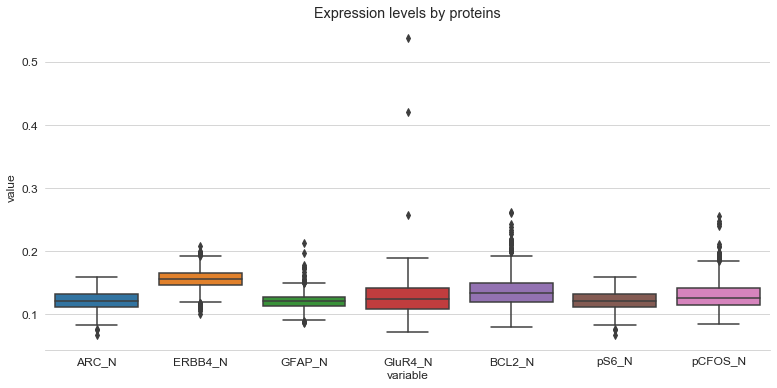

In [141]:
next(exp_boxplots)

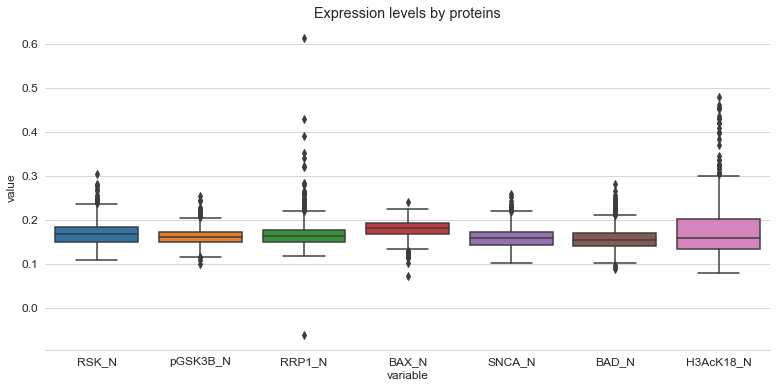

In [142]:
next(exp_boxplots)

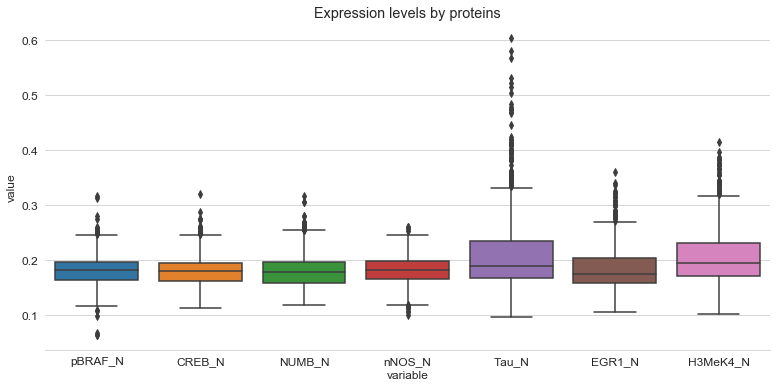

In [143]:
next(exp_boxplots)

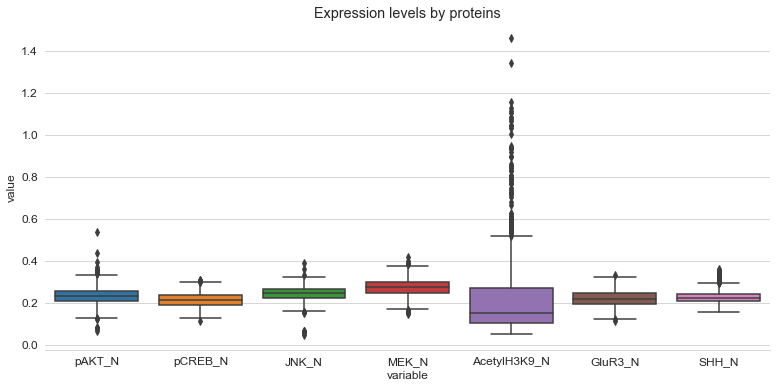

In [144]:
next(exp_boxplots)

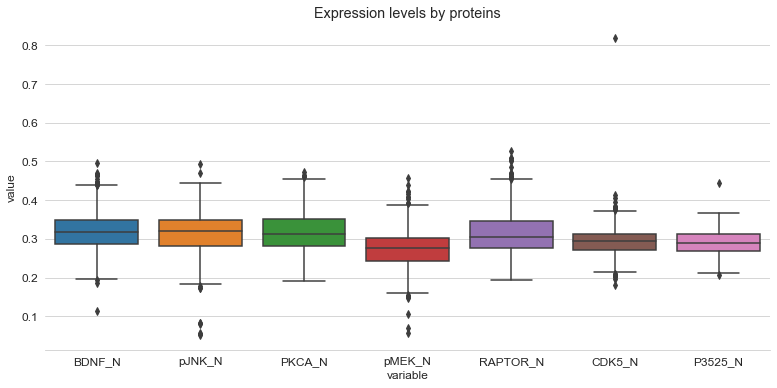

In [145]:
next(exp_boxplots)

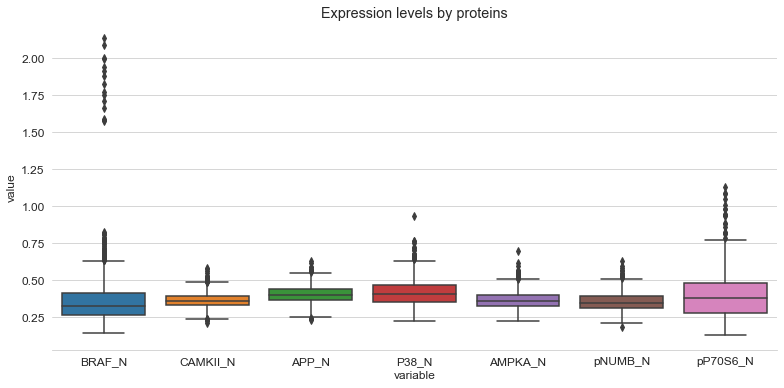

In [146]:
next(exp_boxplots)

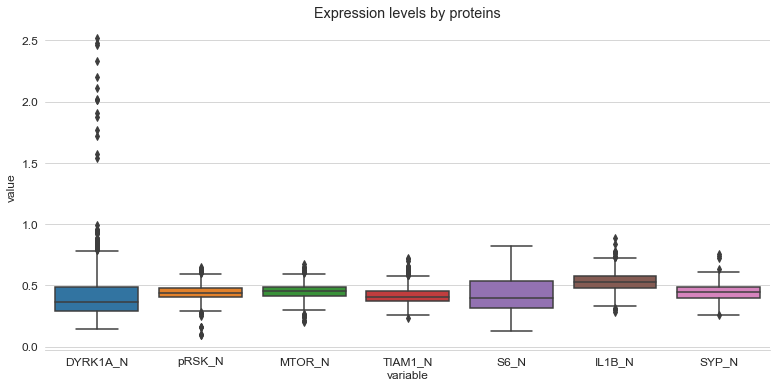

In [147]:
next(exp_boxplots)

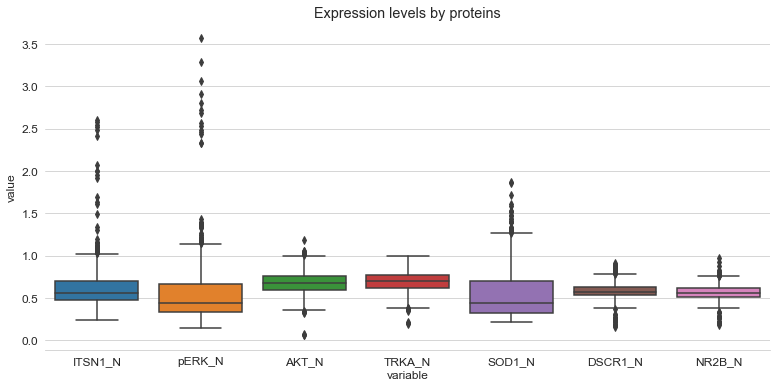

In [148]:
next(exp_boxplots)

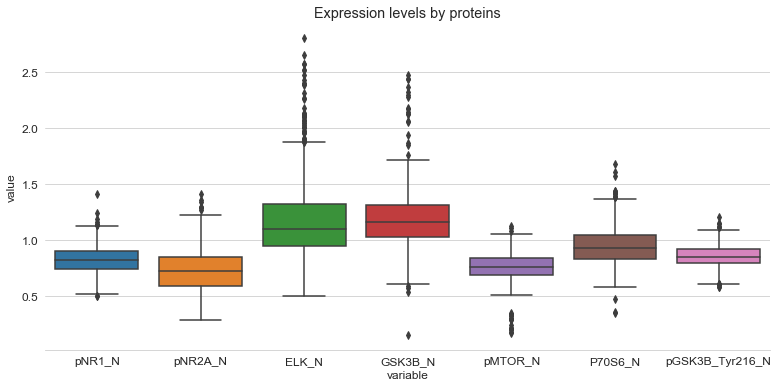

In [149]:
next(exp_boxplots)

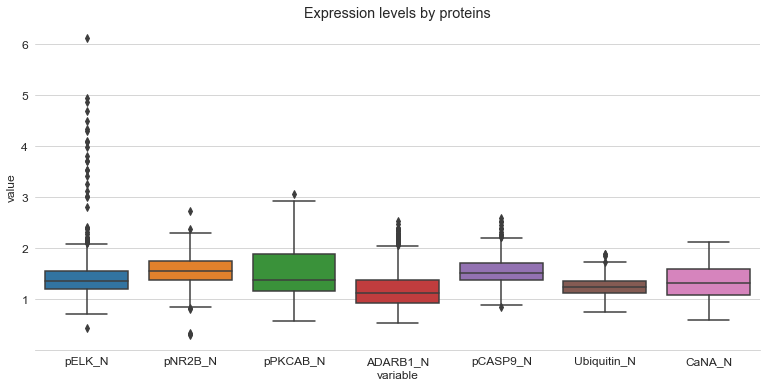

In [150]:
next(exp_boxplots)

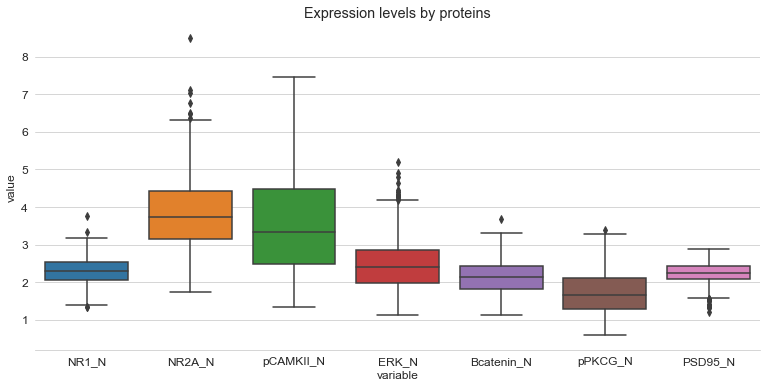

In [151]:
next(exp_boxplots)

In [32]:
# Explore 8 classes

raw_df['class'].value_counts()

c-CS-m    150
c-SC-m    150
c-CS-s    135
t-SC-m    135
t-SC-s    135
c-SC-s    135
t-CS-m    135
t-CS-s    105
Name: class, dtype: int64

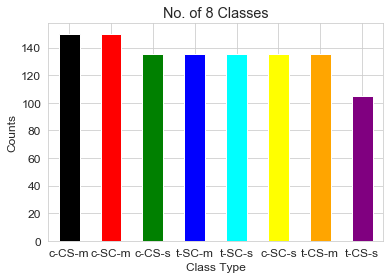

In [129]:
# Plot number of unique values for 'class'

raw_df['class'].value_counts().plot(kind='bar', color=['black', 'red', 'green', 'blue', 'cyan', 'yellow', 'orange', 'purple'])
plt.title('No. of 8 Classes')
plt.xlabel('Class Type')
plt.xticks(rotation='horizontal')
plt.ylabel('Counts')
plt.show()

Task 2 - Explore the relationship between all pairs of attributes

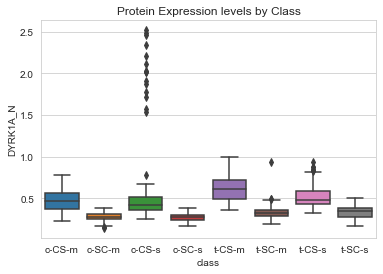

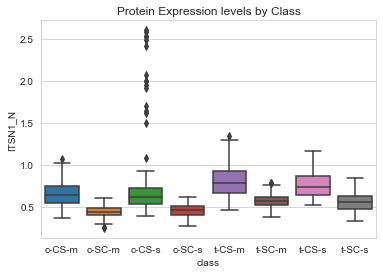

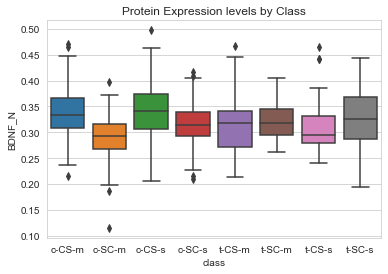

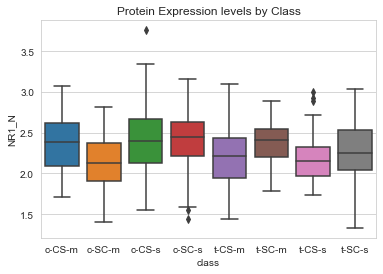

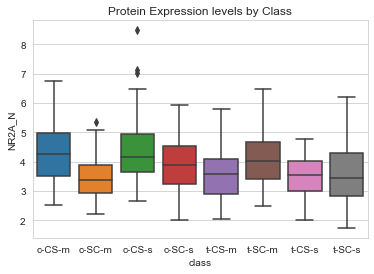

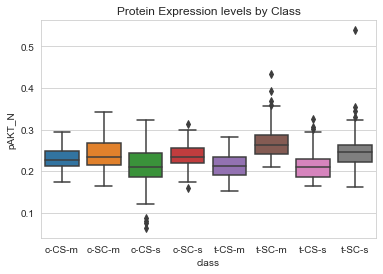

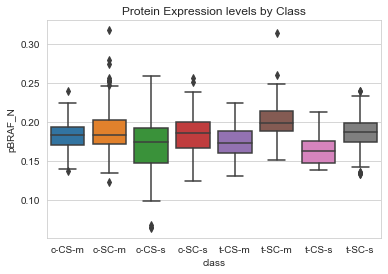

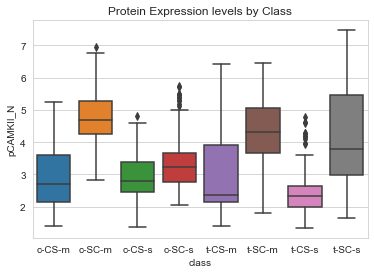

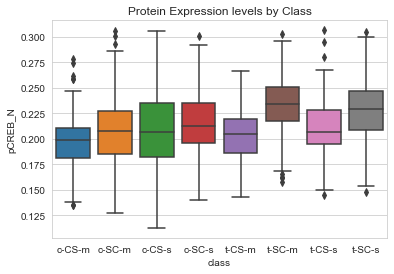

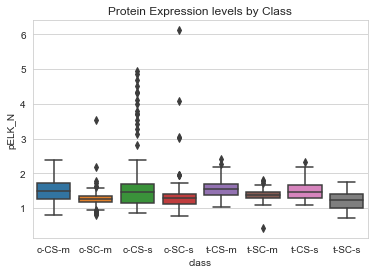

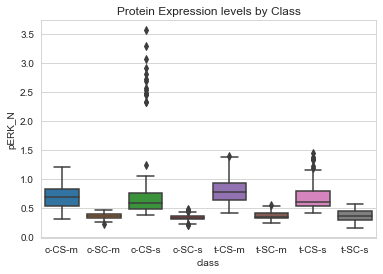

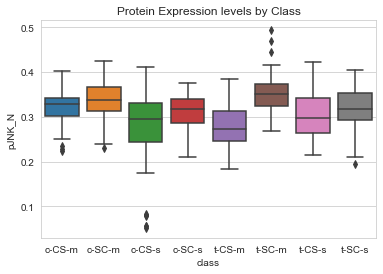

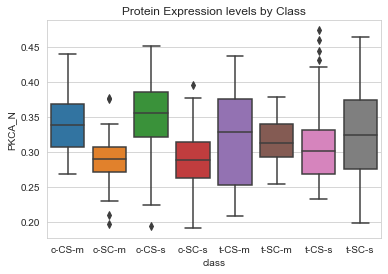

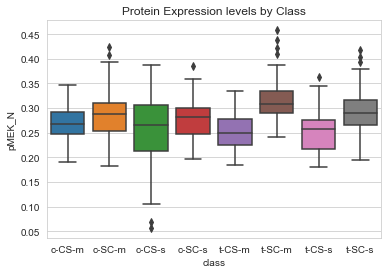

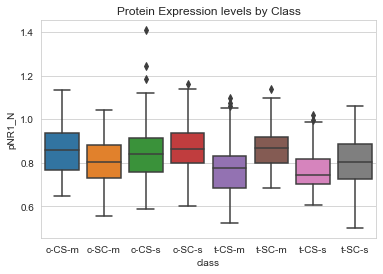

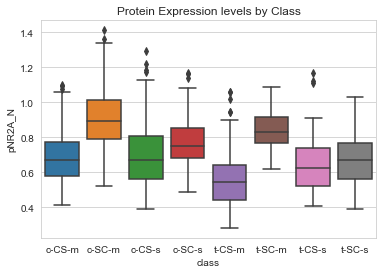

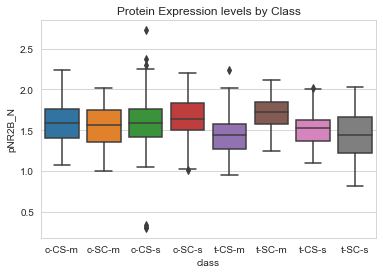

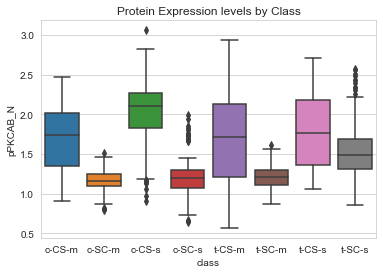

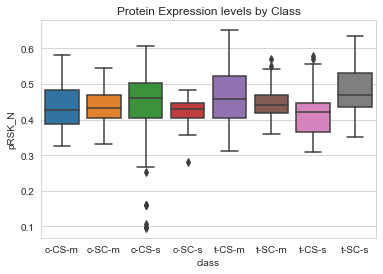

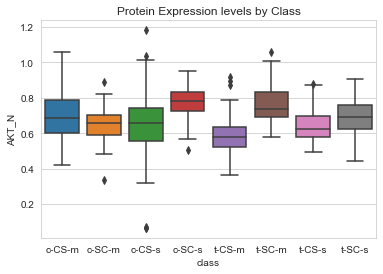

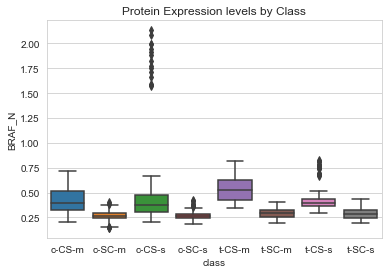

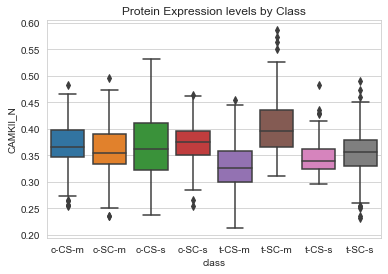

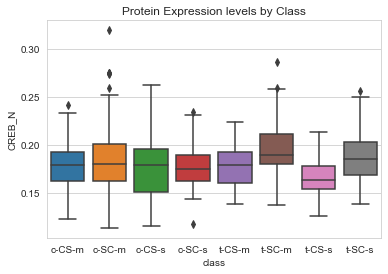

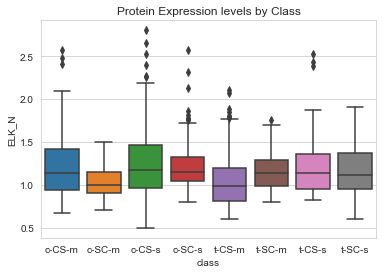

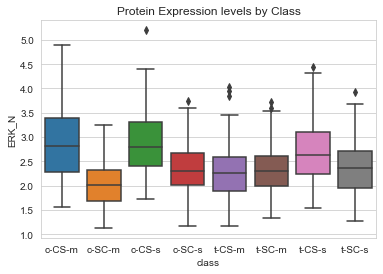

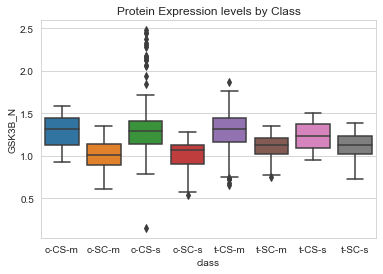

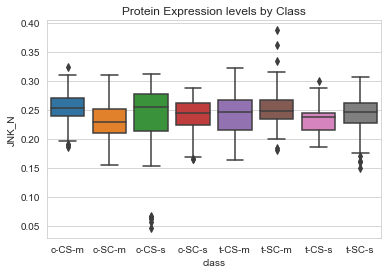

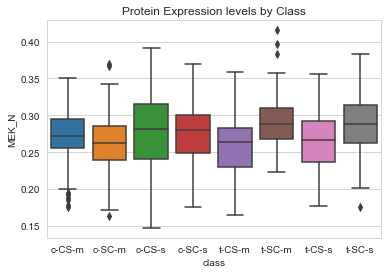

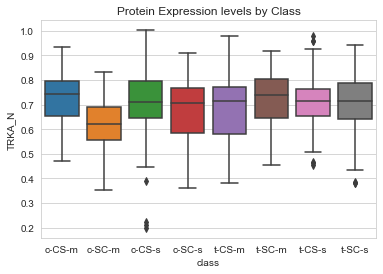

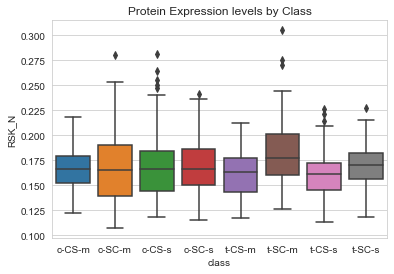

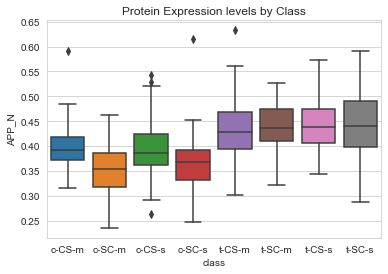

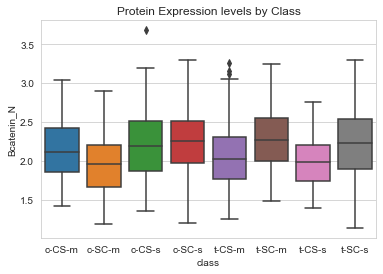

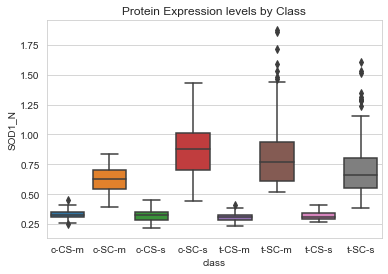

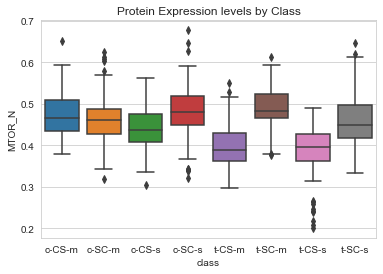

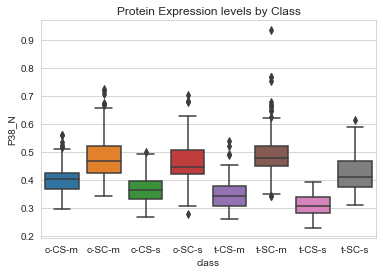

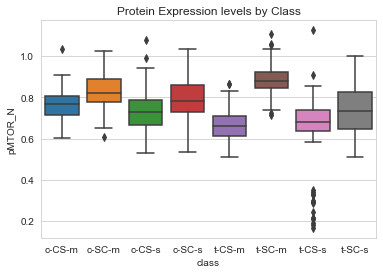

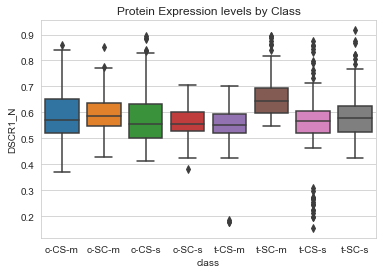

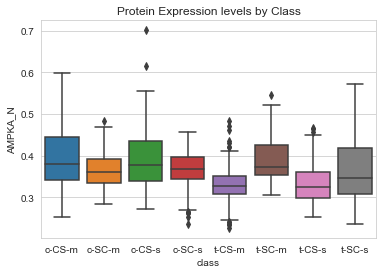

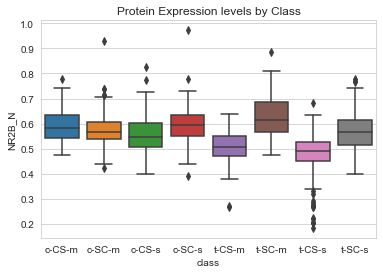

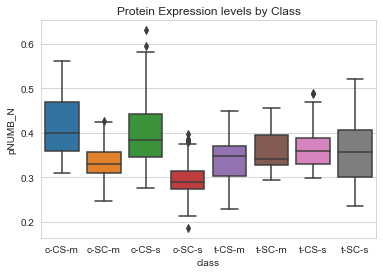

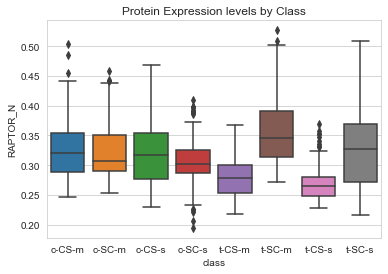

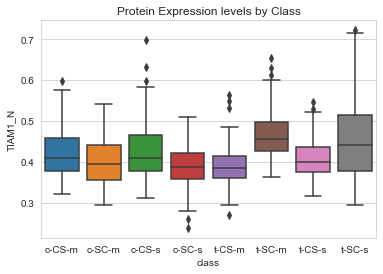

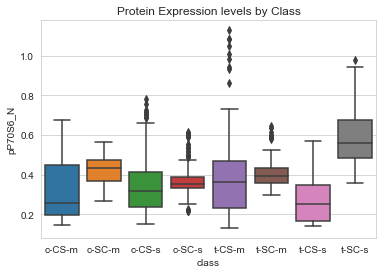

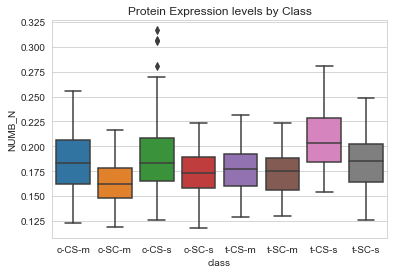

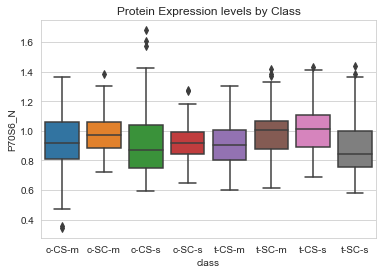

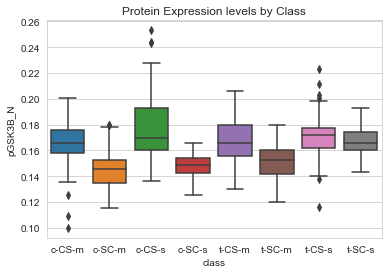

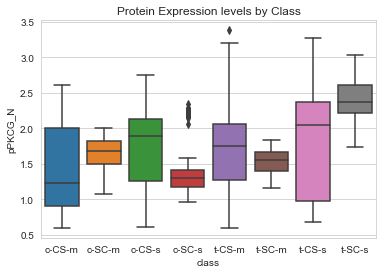

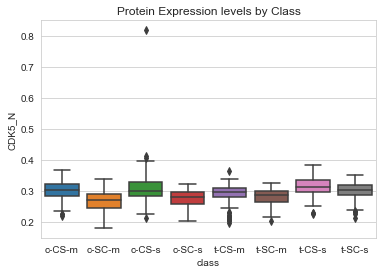

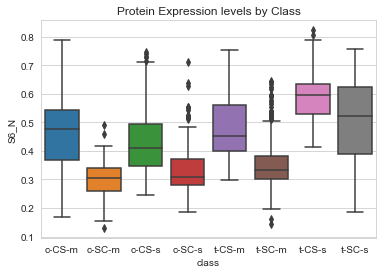

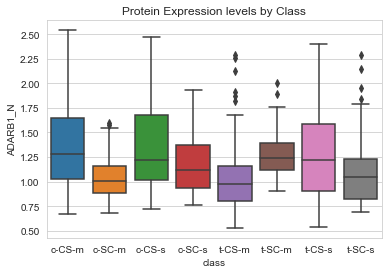

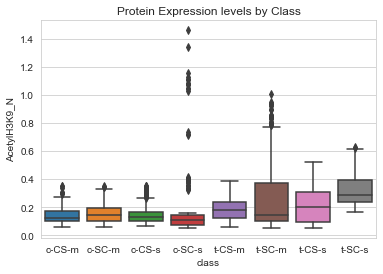

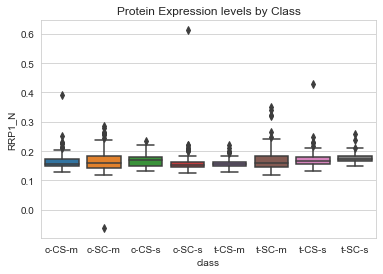

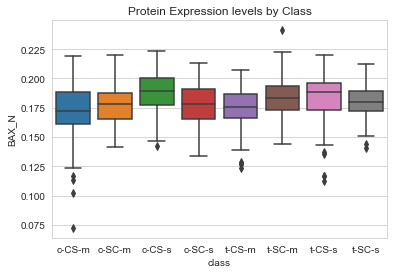

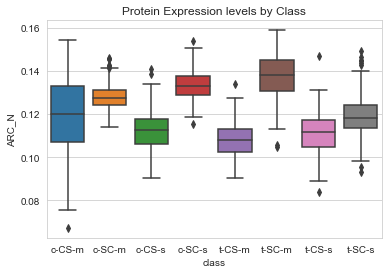

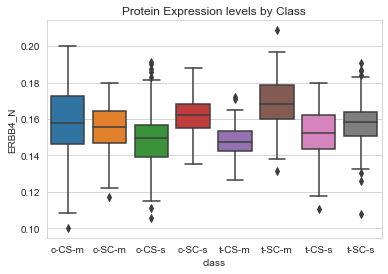

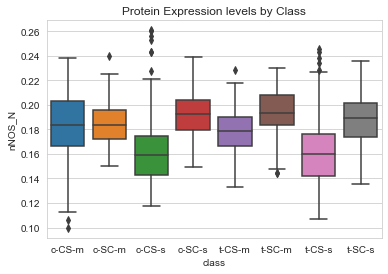

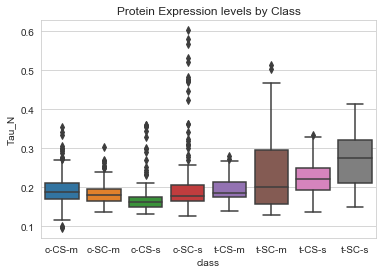

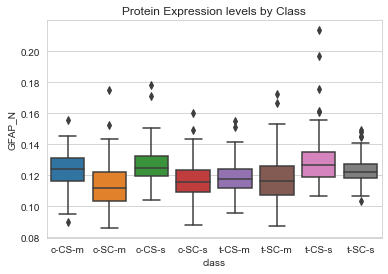

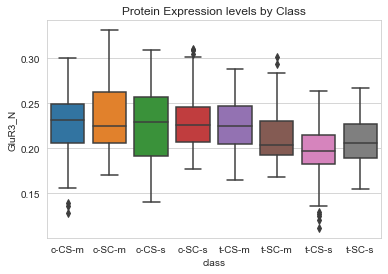

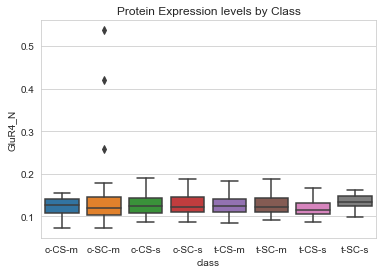

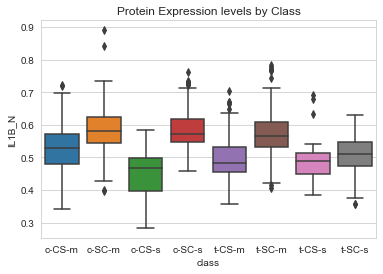

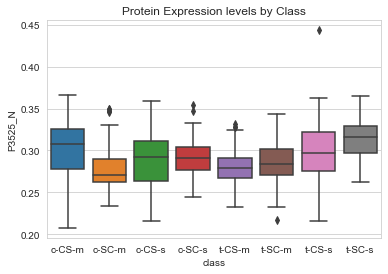

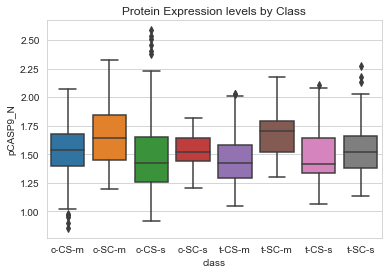

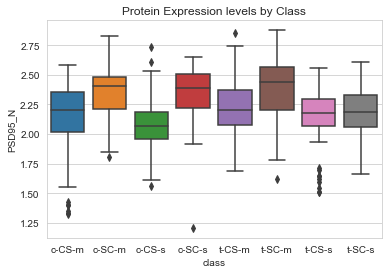

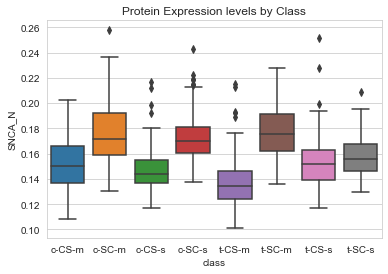

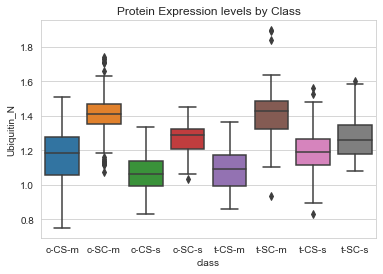

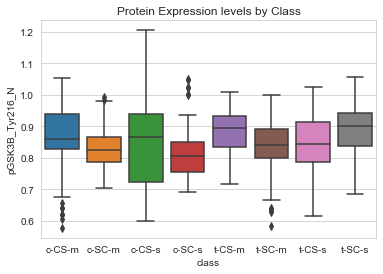

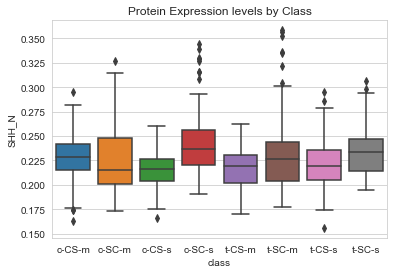

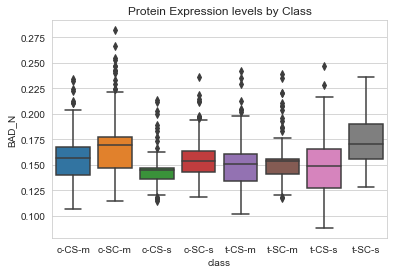

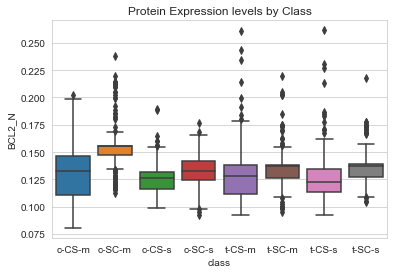

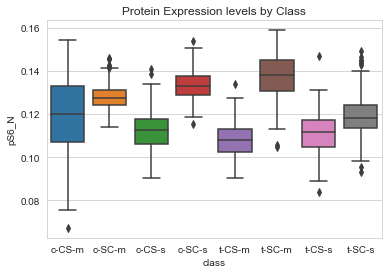

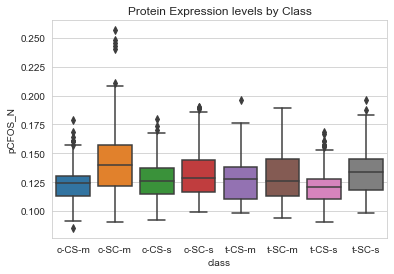

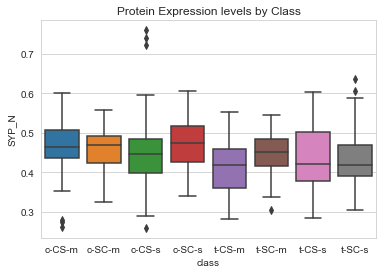

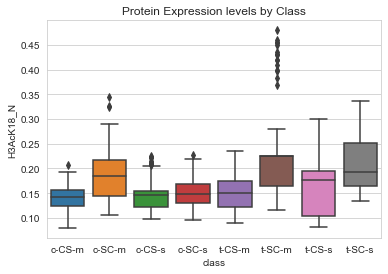

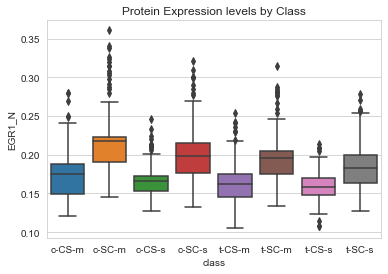

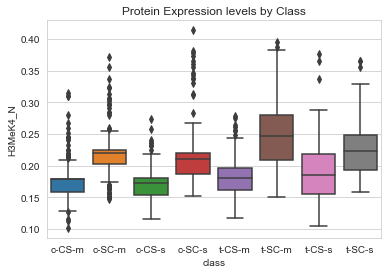

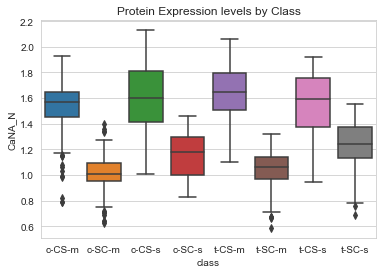

In [34]:
# Boxplot to show expression levels of each protiens by class 

proteins = raw_df.columns[0:77]

for p in proteins:
    sns.boxplot(data = raw_df, x = 'class', y = p).set_title("Protein Expression levels by Class")
    
    plt.show()


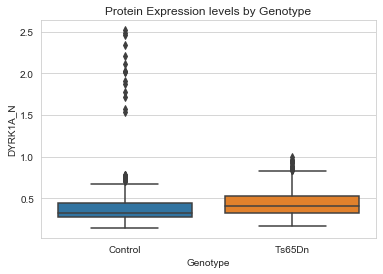

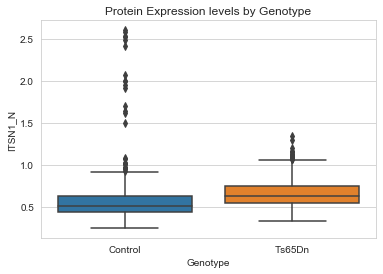

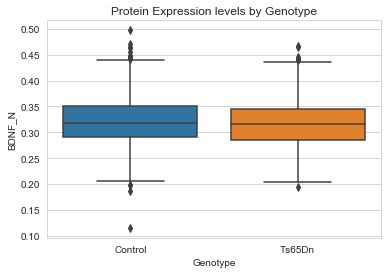

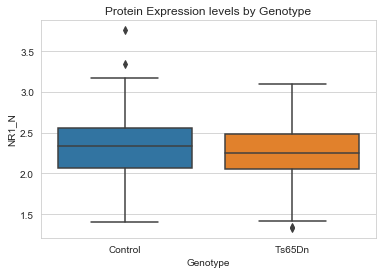

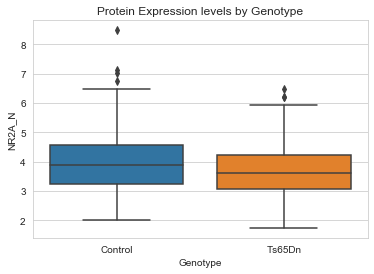

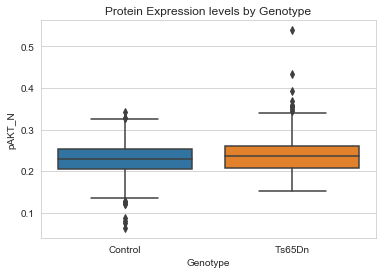

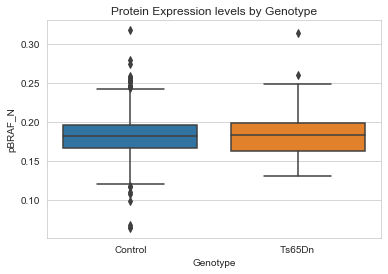

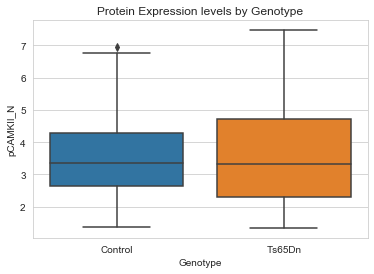

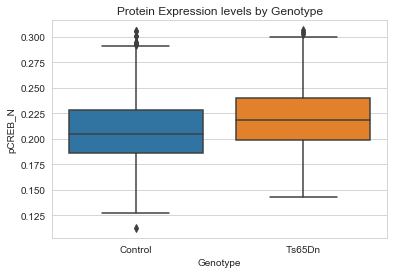

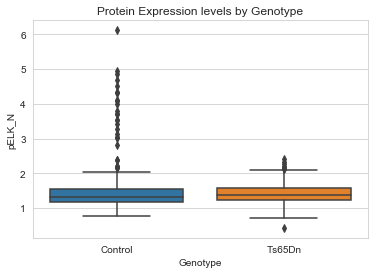

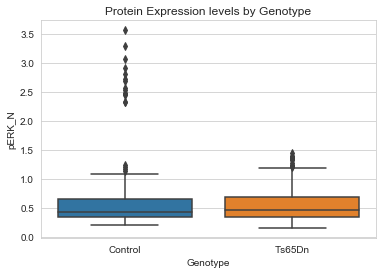

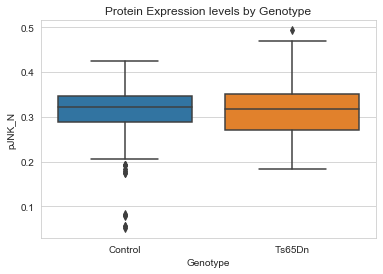

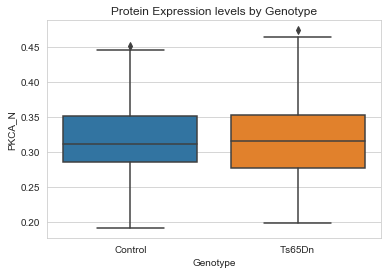

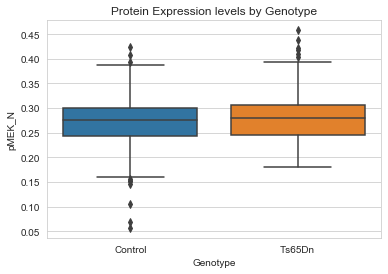

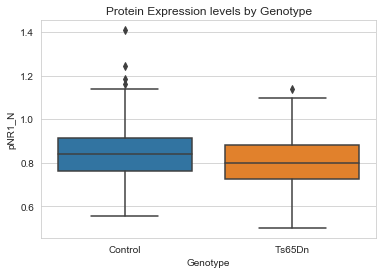

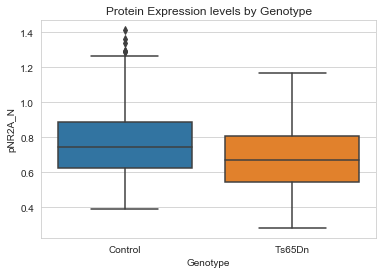

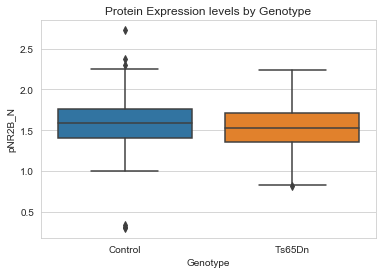

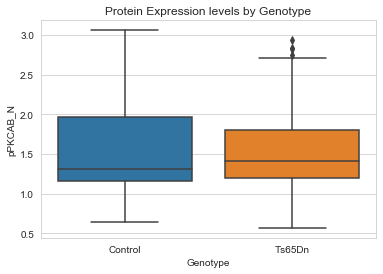

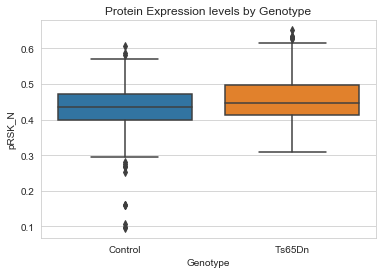

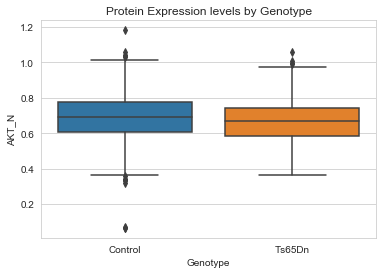

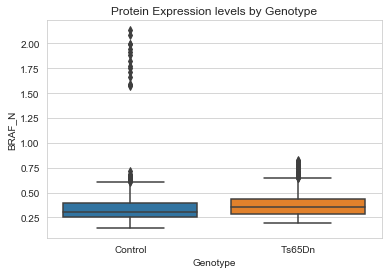

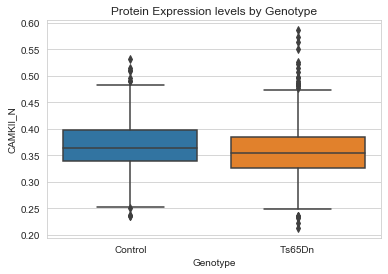

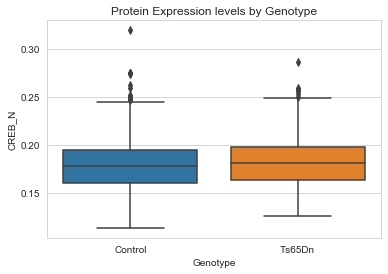

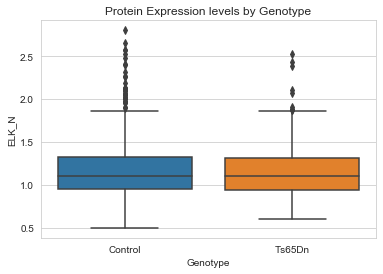

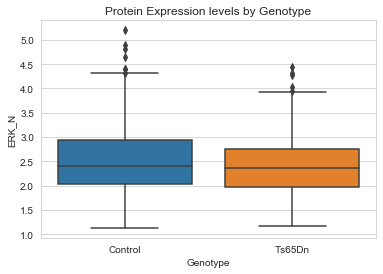

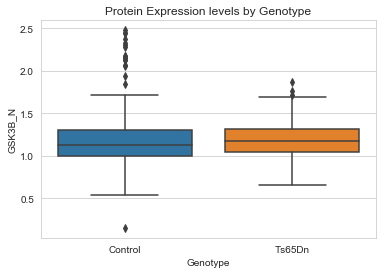

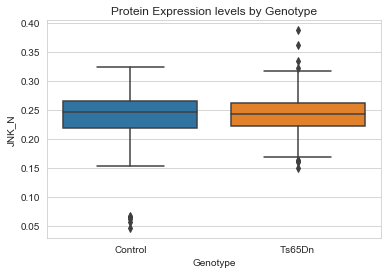

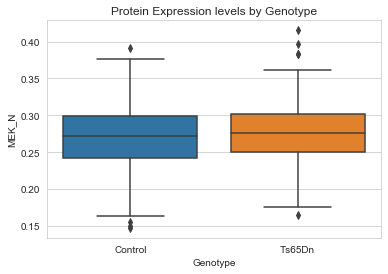

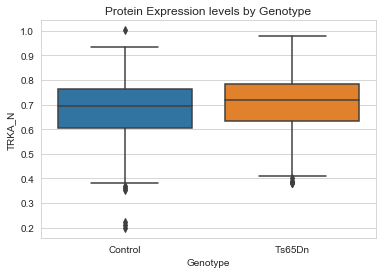

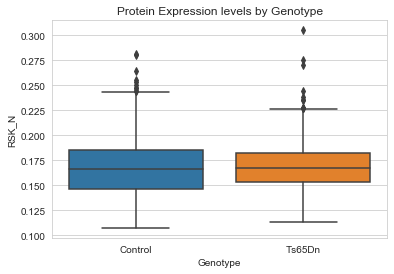

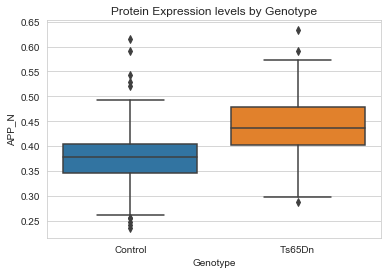

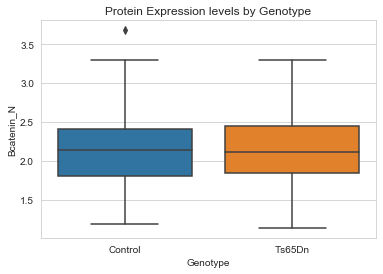

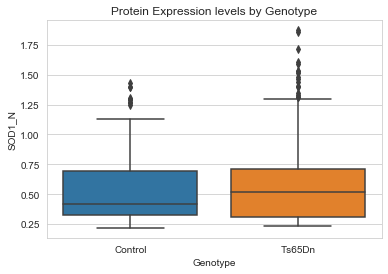

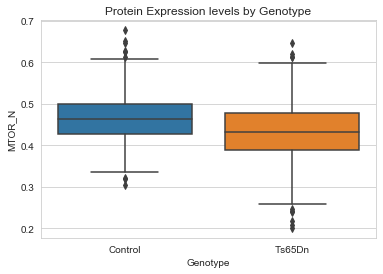

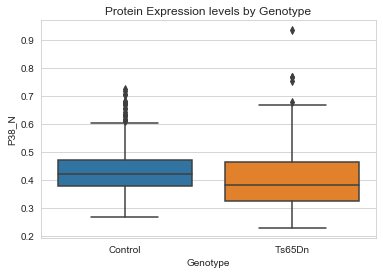

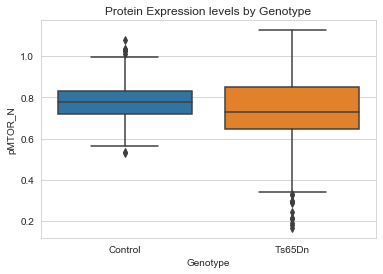

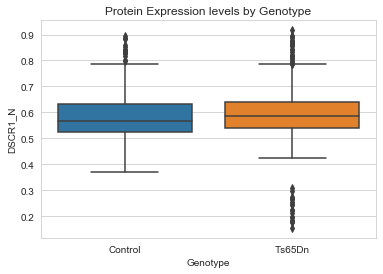

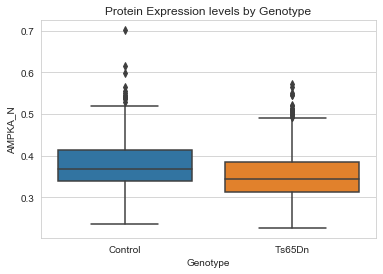

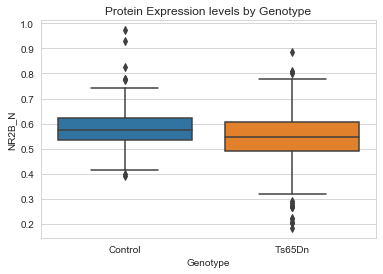

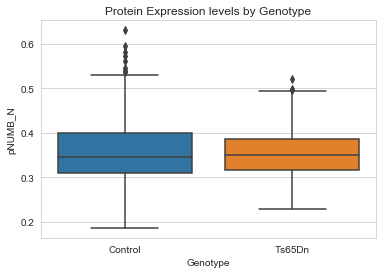

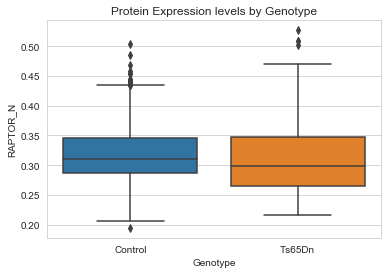

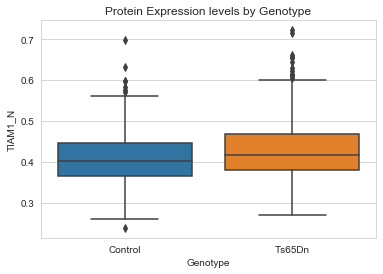

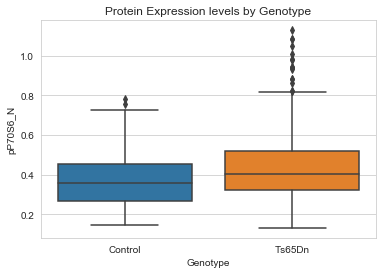

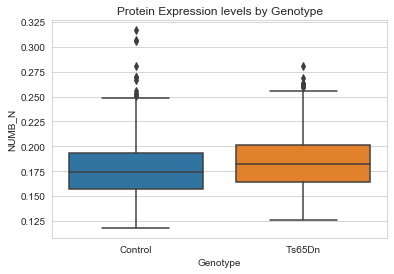

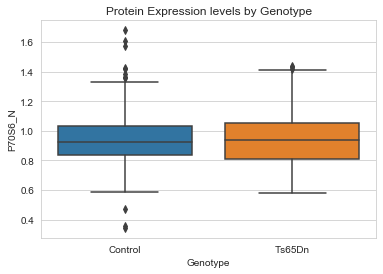

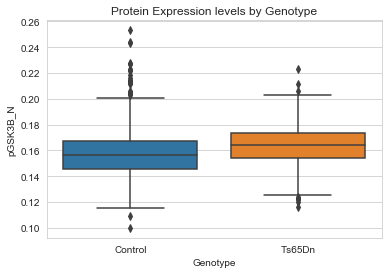

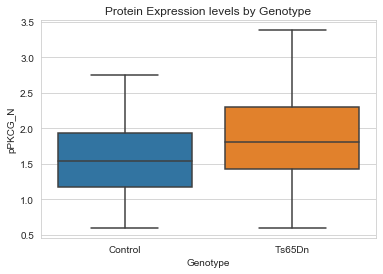

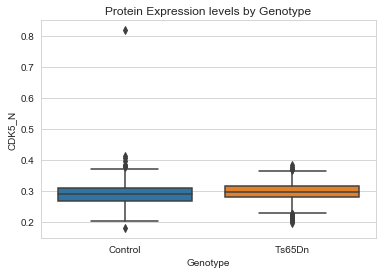

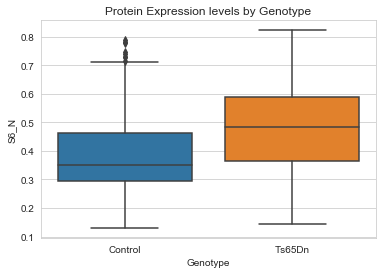

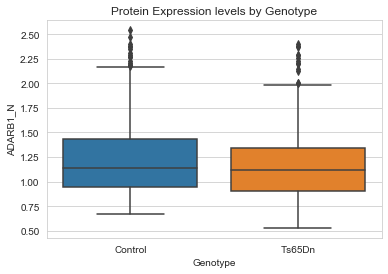

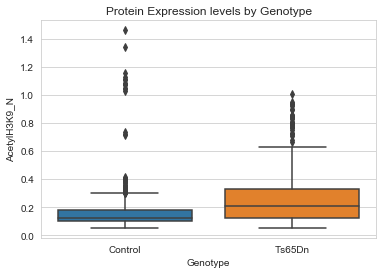

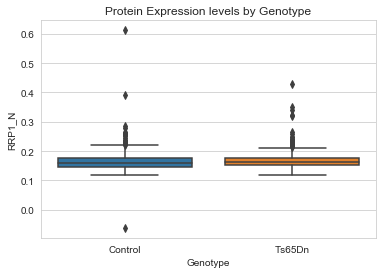

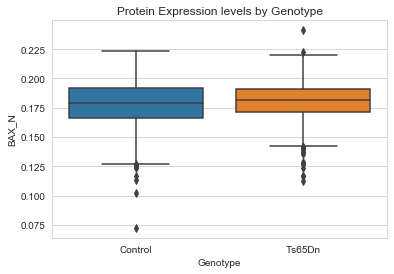

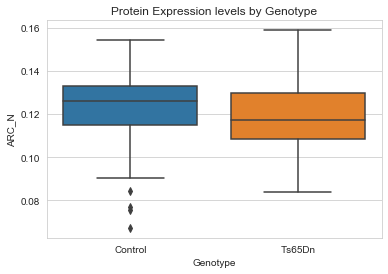

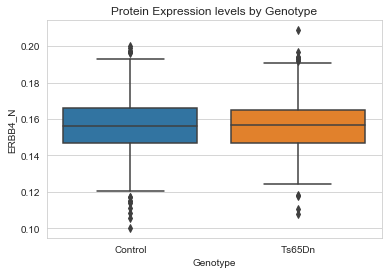

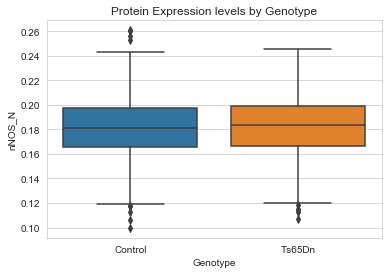

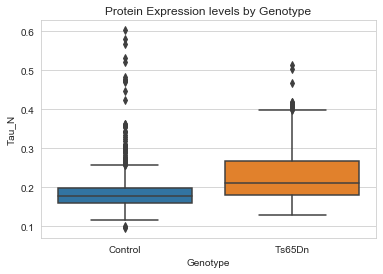

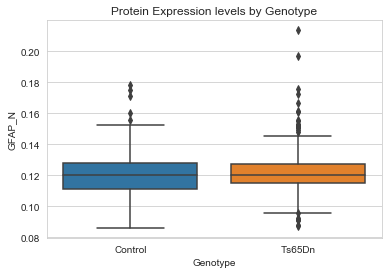

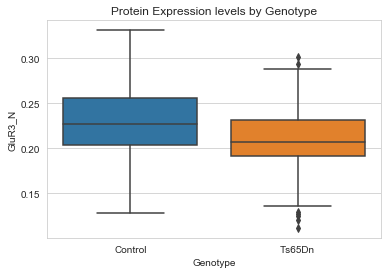

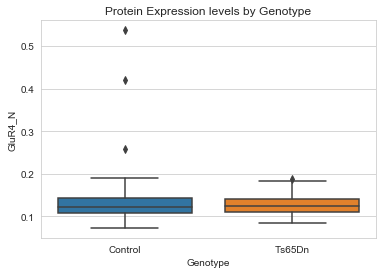

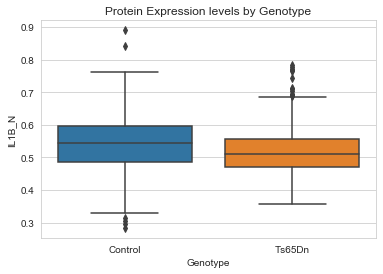

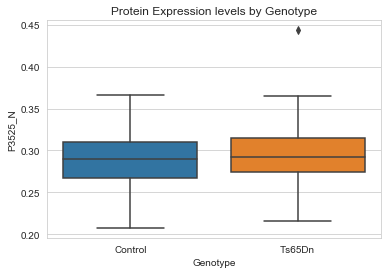

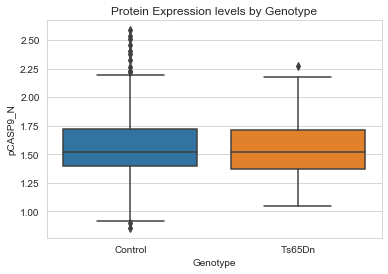

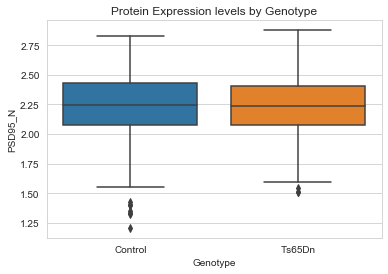

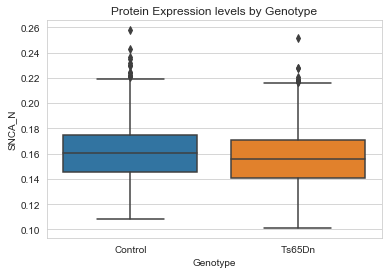

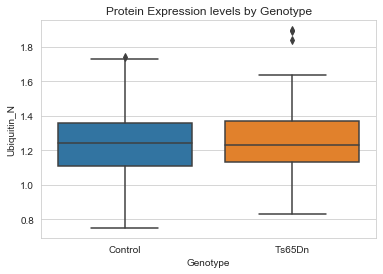

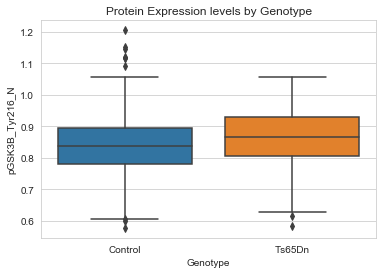

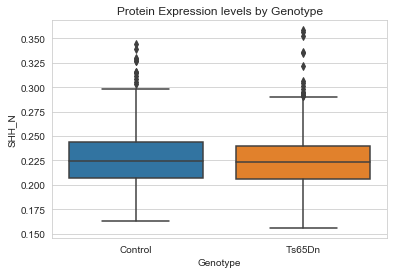

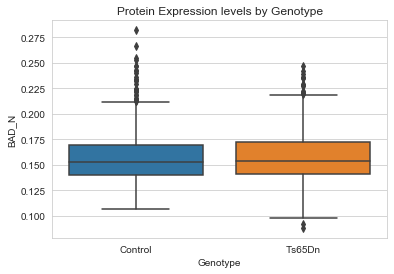

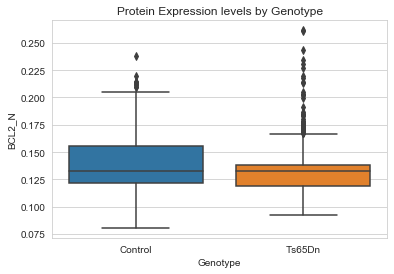

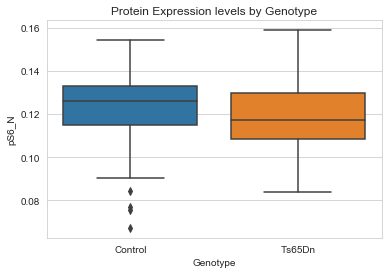

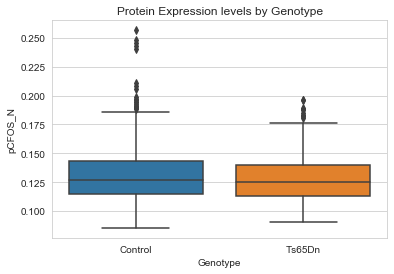

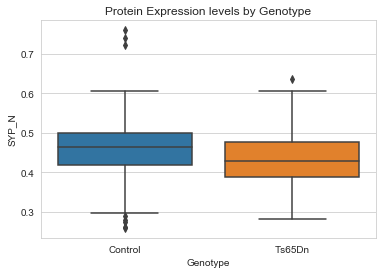

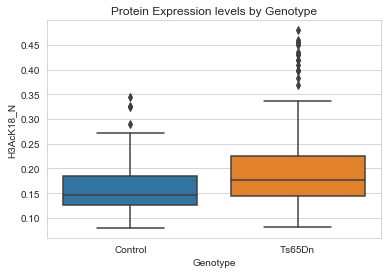

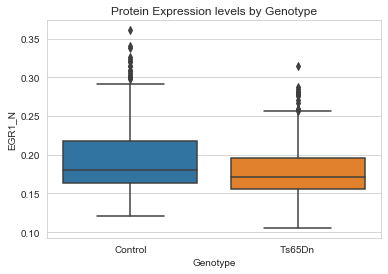

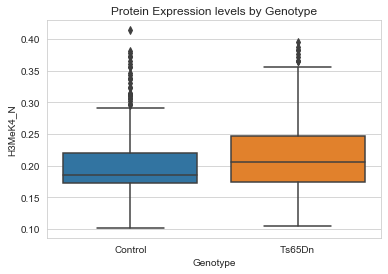

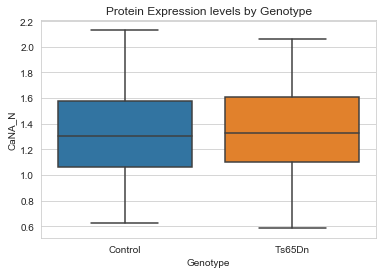

In [35]:
# Boxplot to show expression levels of each protiens by Genotype 

proteins = raw_df.columns[0:77]

for p in proteins:
    sns.boxplot(data = raw_df, x = 'Genotype', y = p).set_title("Protein Expression levels by Genotype")
    
    plt.show()

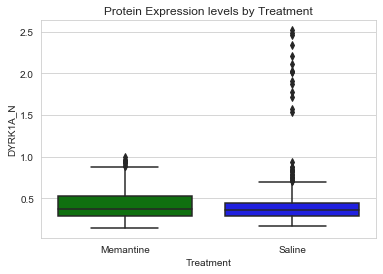

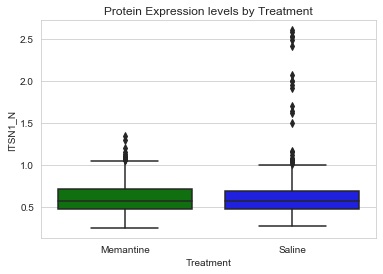

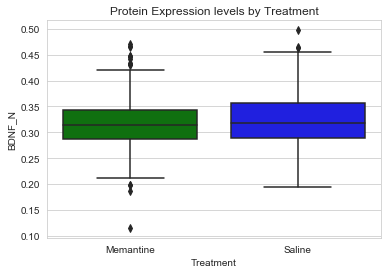

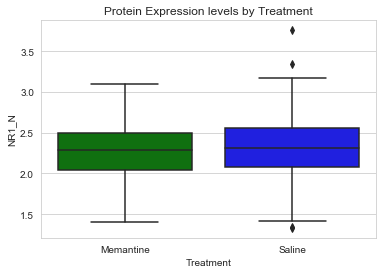

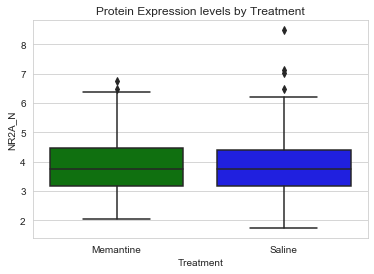

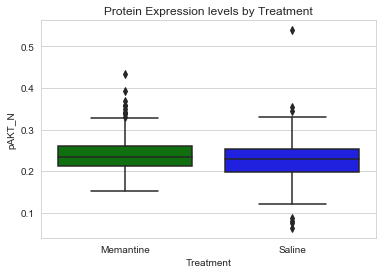

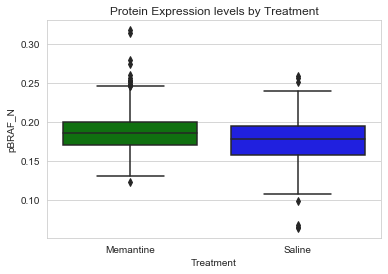

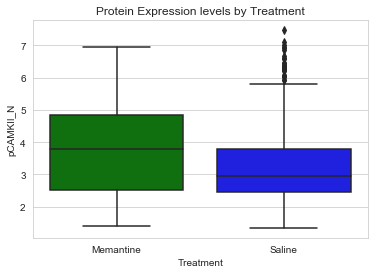

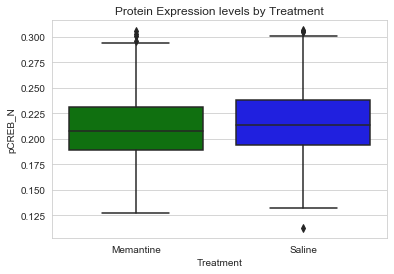

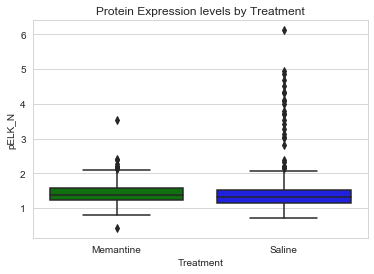

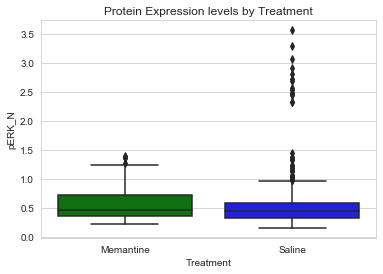

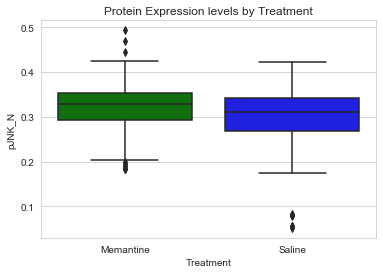

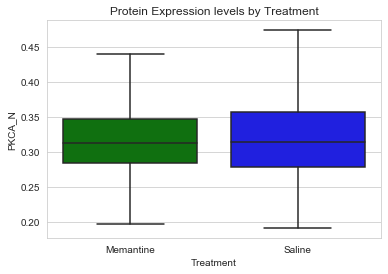

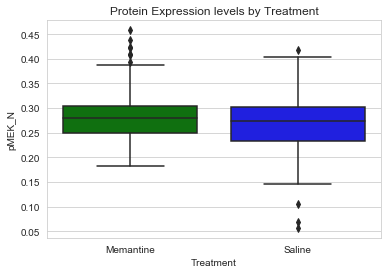

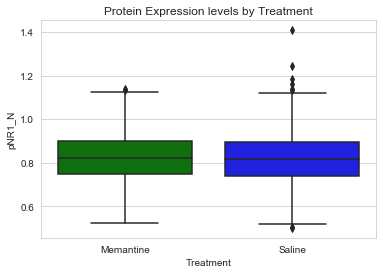

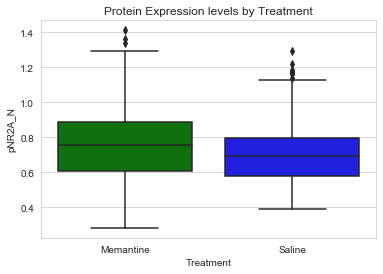

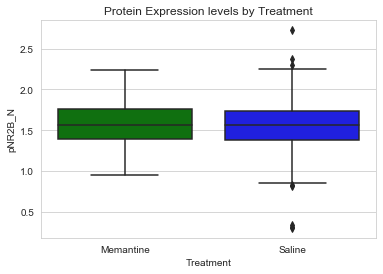

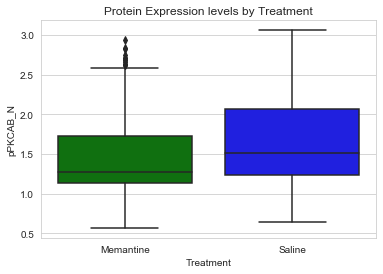

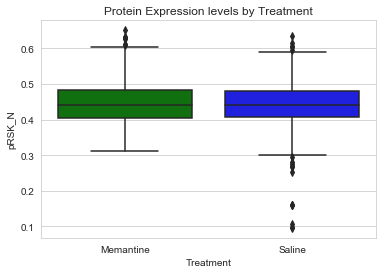

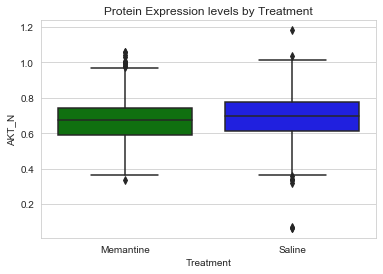

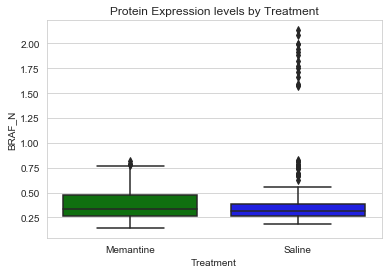

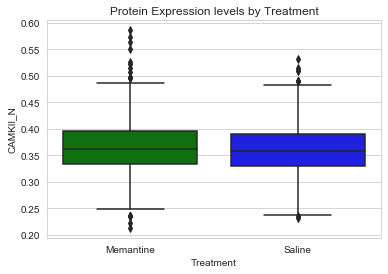

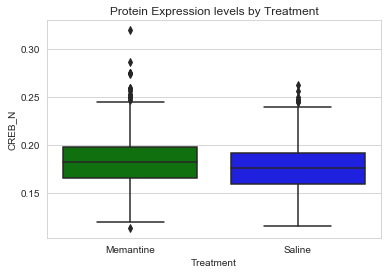

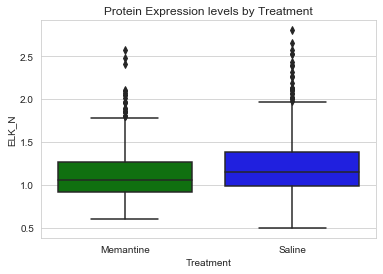

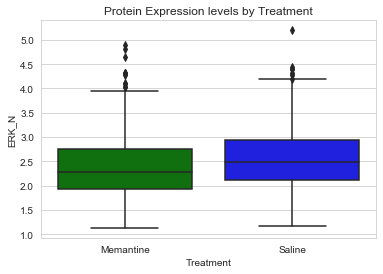

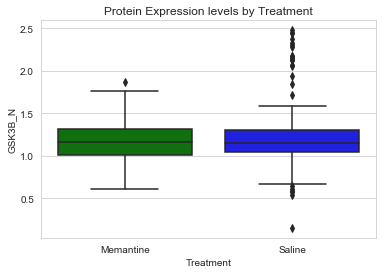

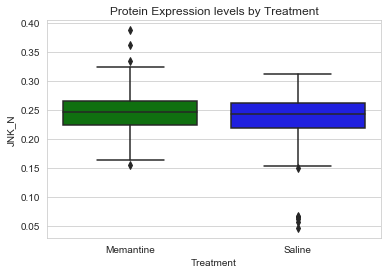

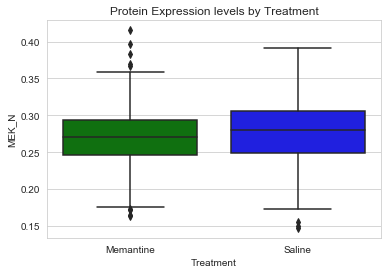

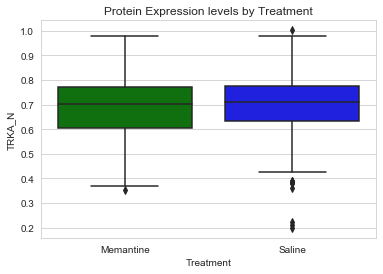

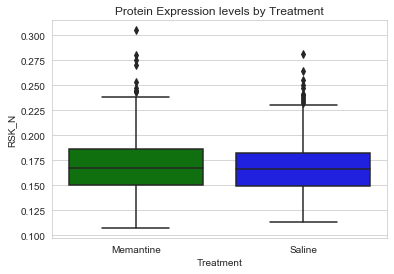

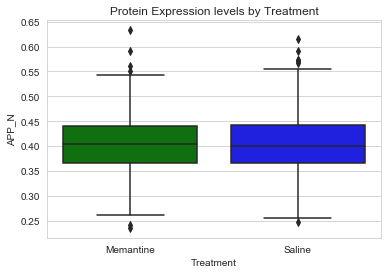

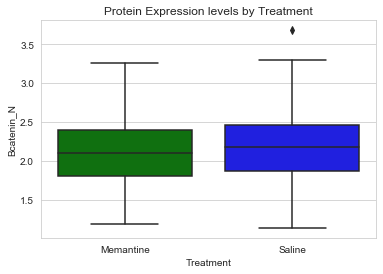

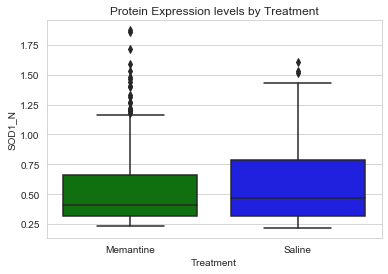

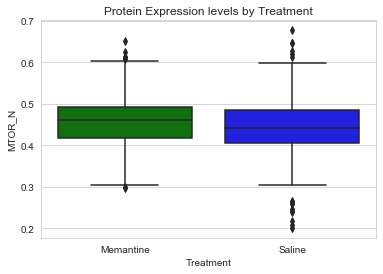

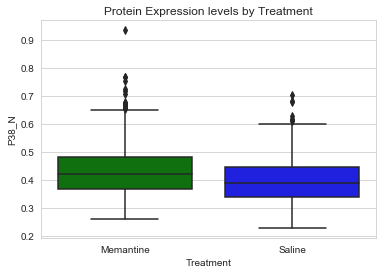

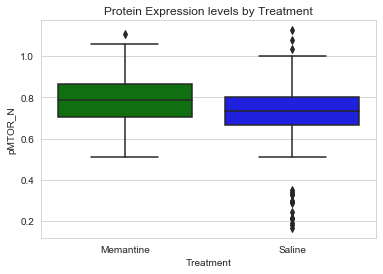

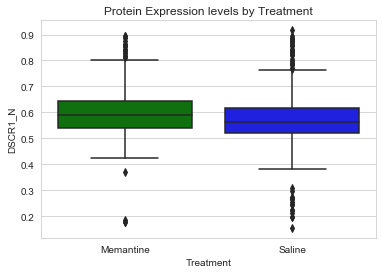

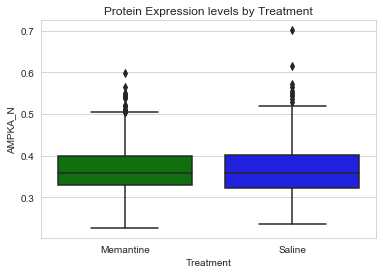

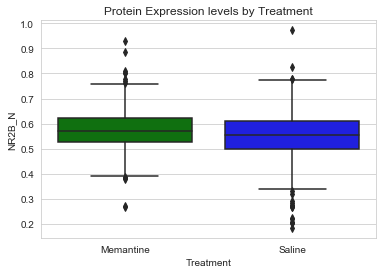

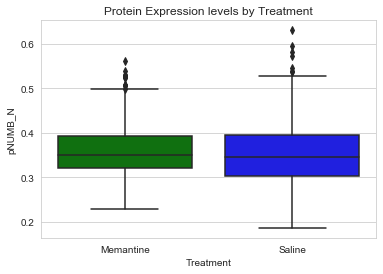

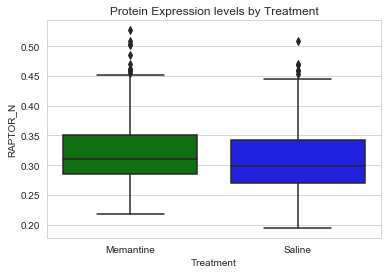

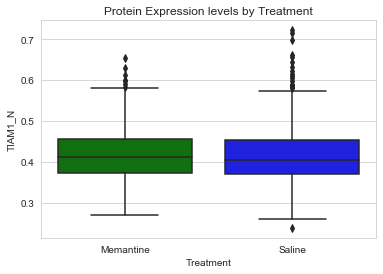

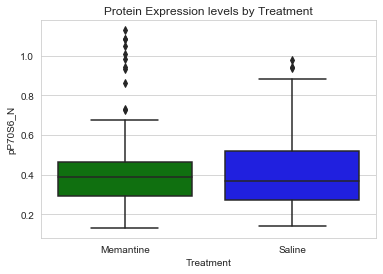

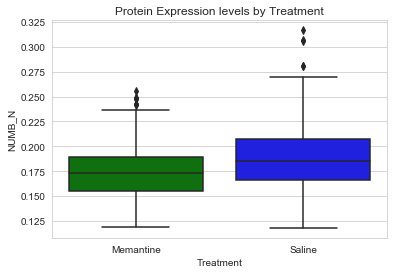

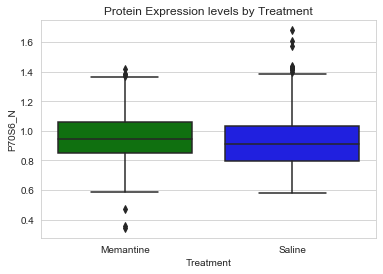

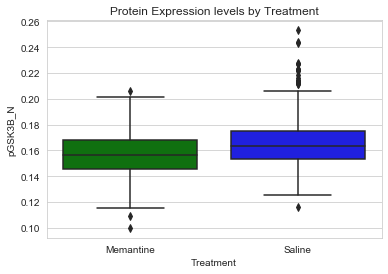

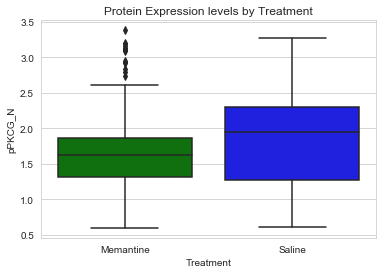

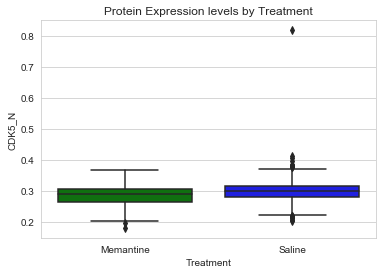

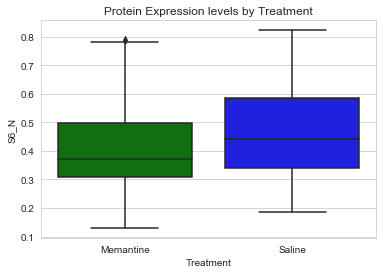

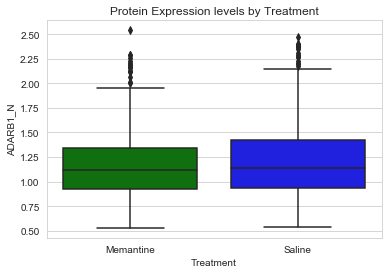

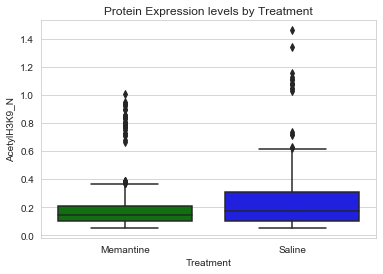

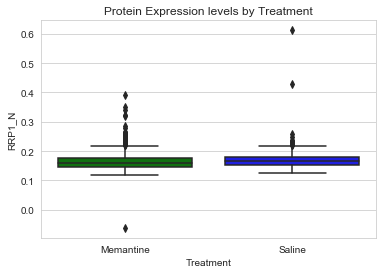

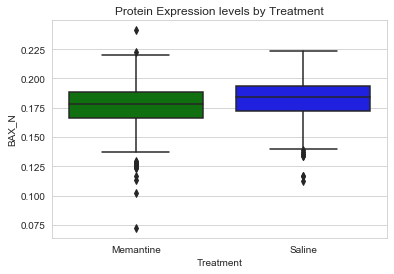

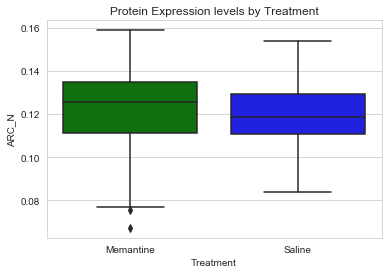

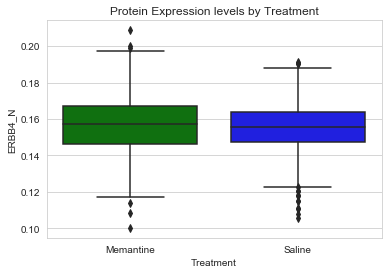

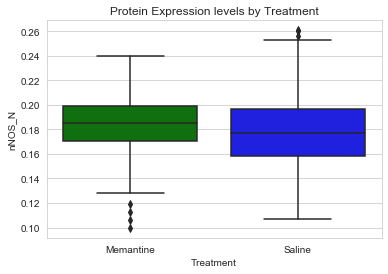

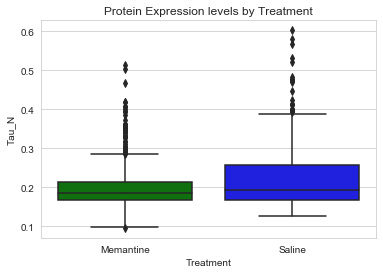

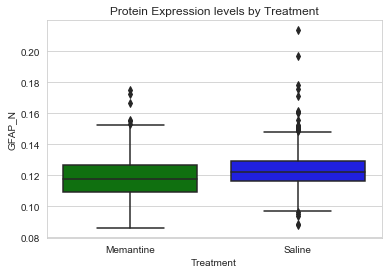

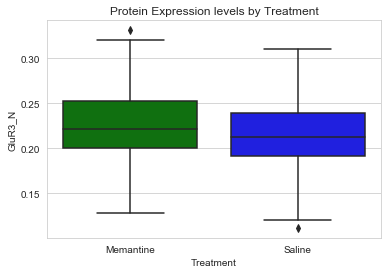

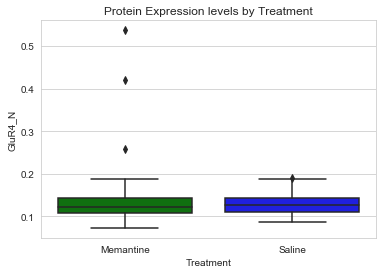

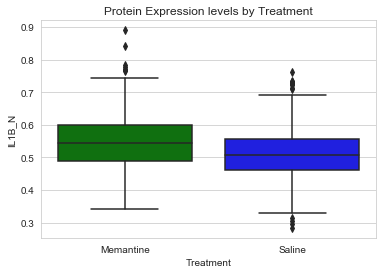

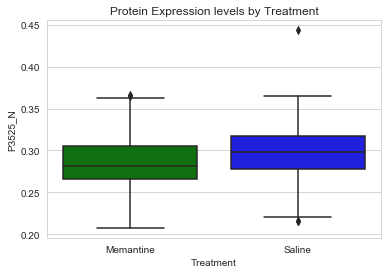

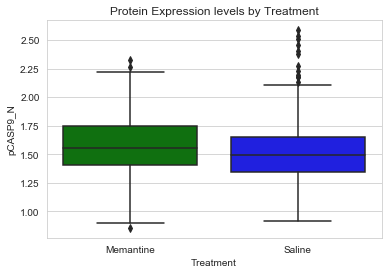

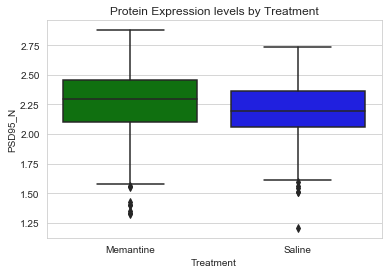

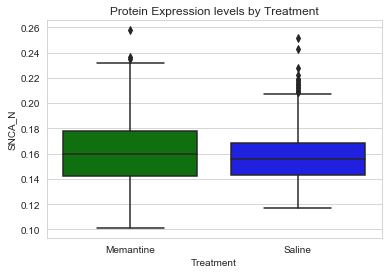

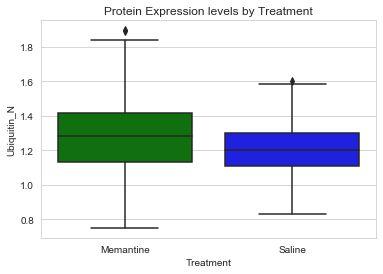

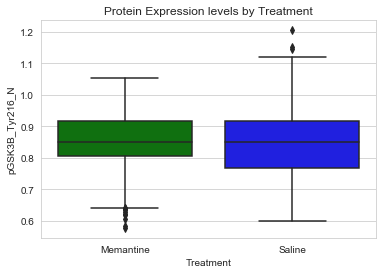

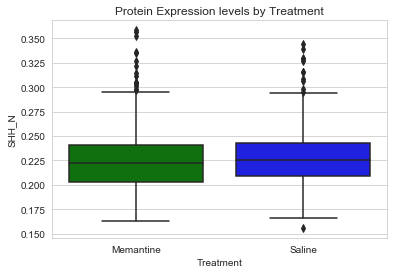

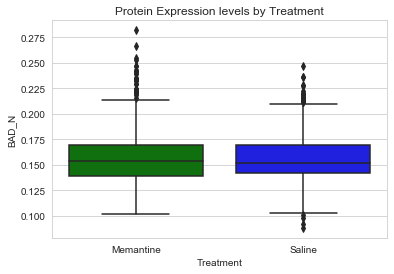

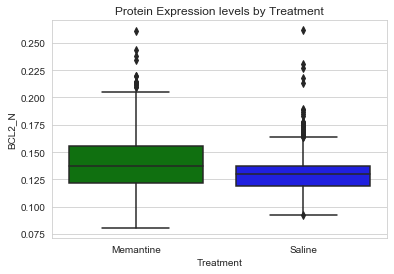

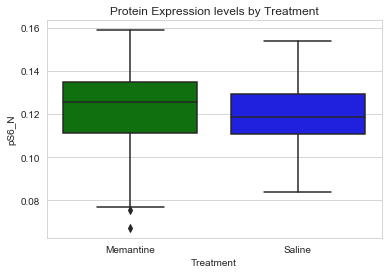

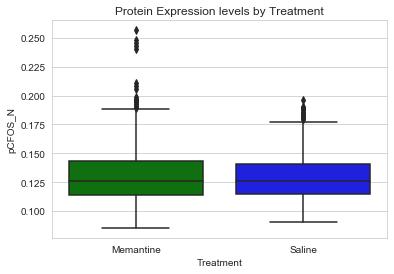

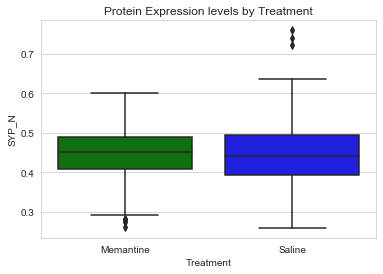

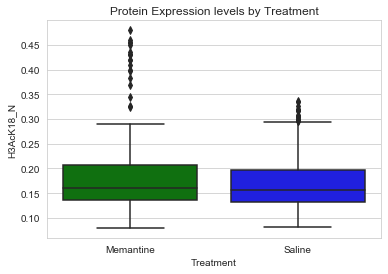

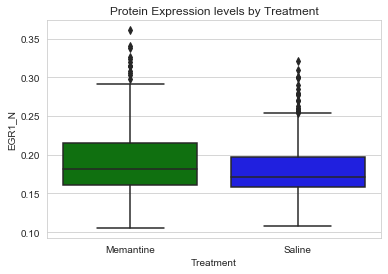

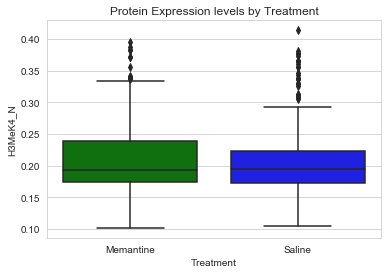

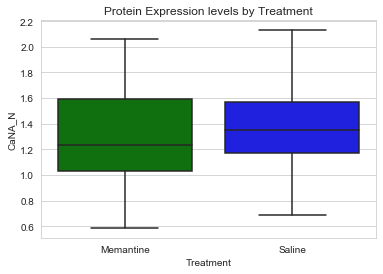

In [36]:
# Boxplot to show expression levels of each protiens by Treatment 

proteins = raw_df.columns[0:77]

my_pal = {"Memantine": "g", "Saline": "b"}

for p in proteins:
    sns.boxplot(data = raw_df, x = 'Treatment', y = p, palette=my_pal).set_title("Protein Expression levels by Treatment")
    
    plt.show()

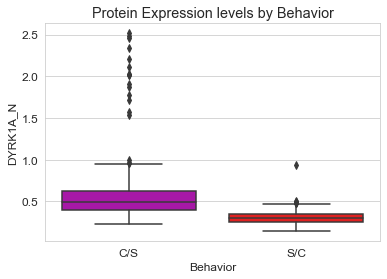

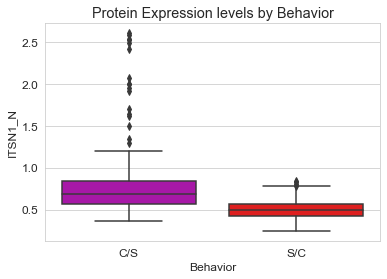

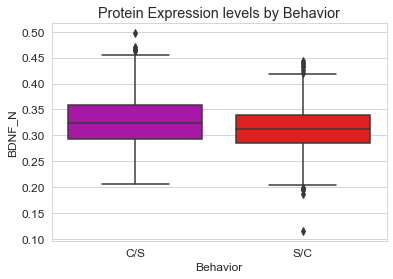

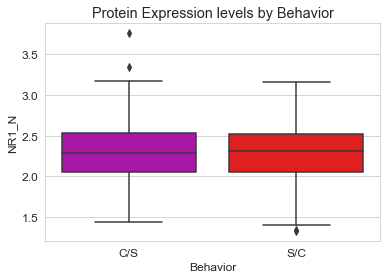

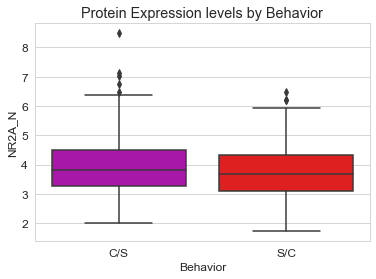

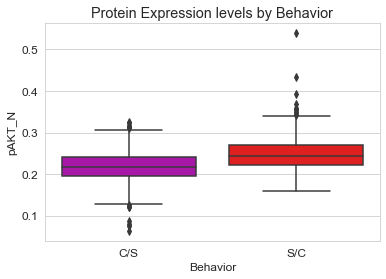

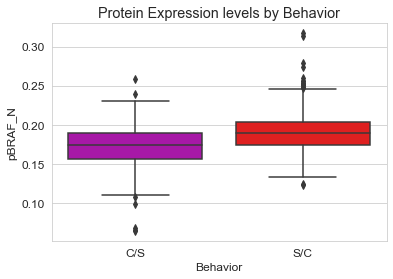

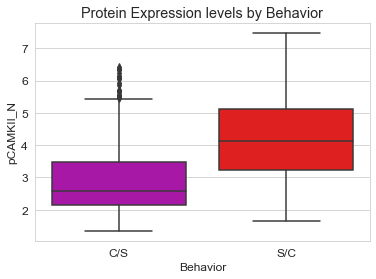

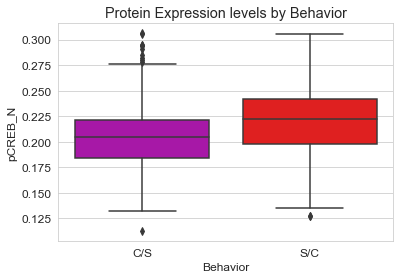

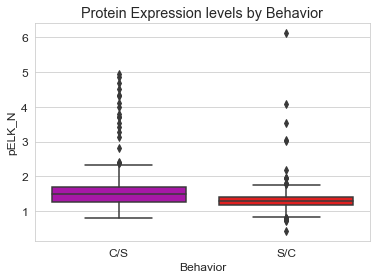

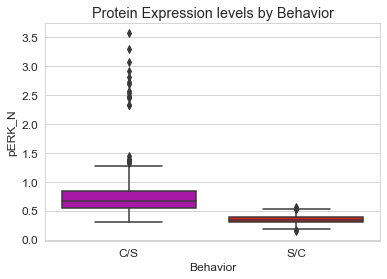

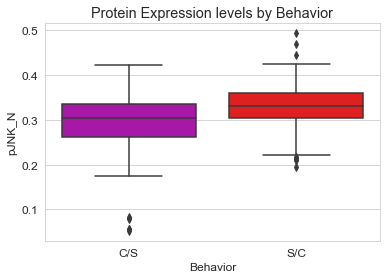

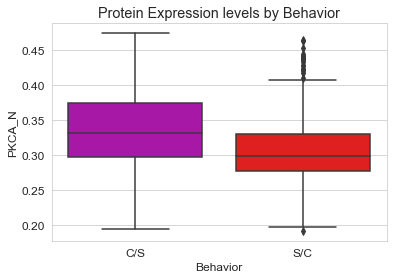

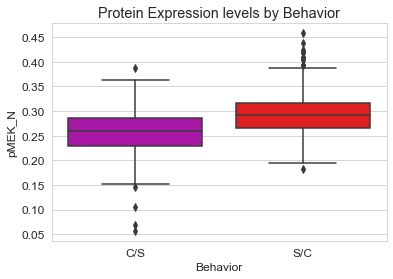

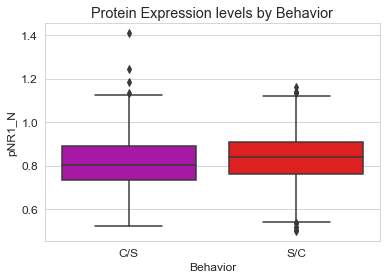

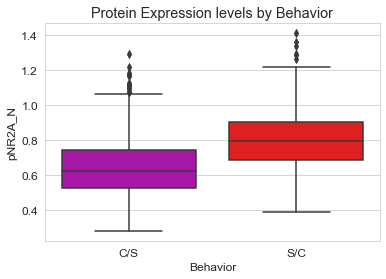

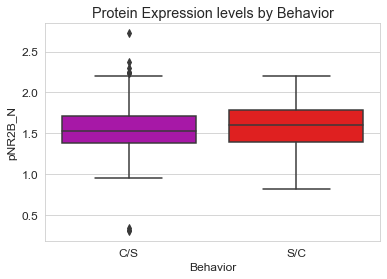

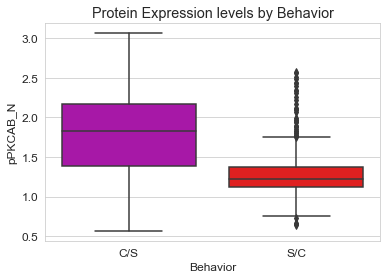

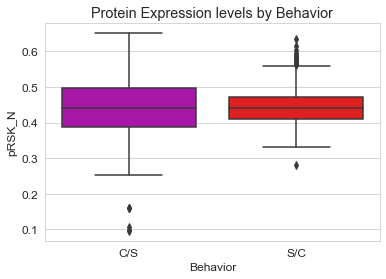

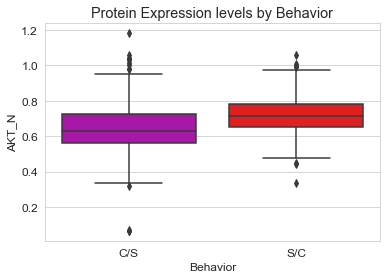

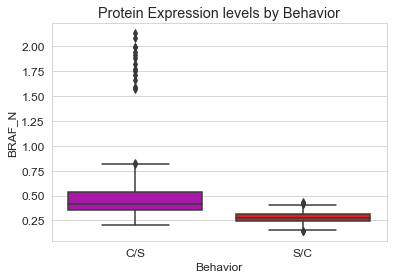

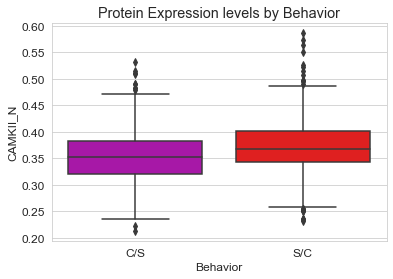

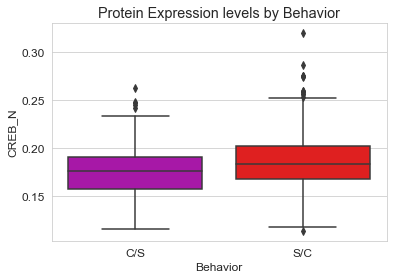

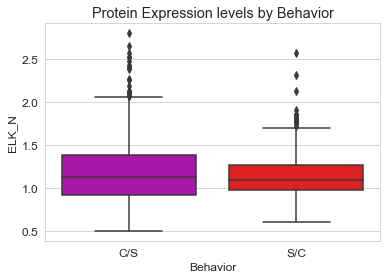

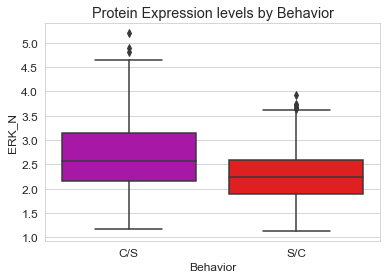

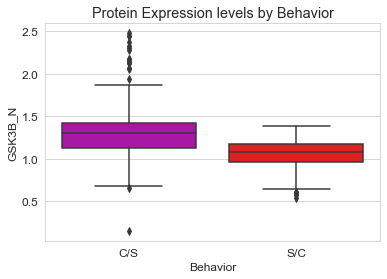

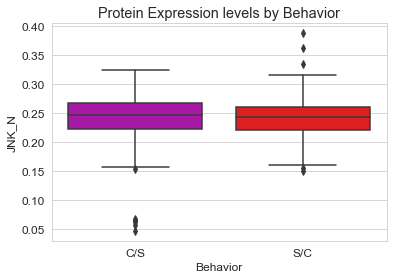

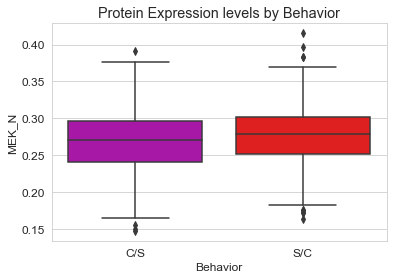

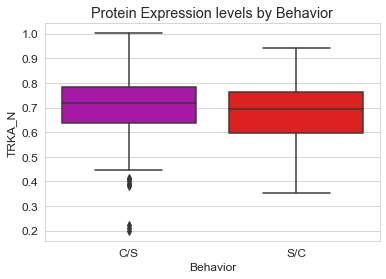

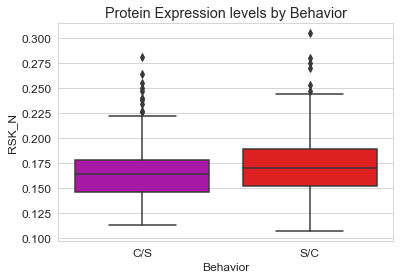

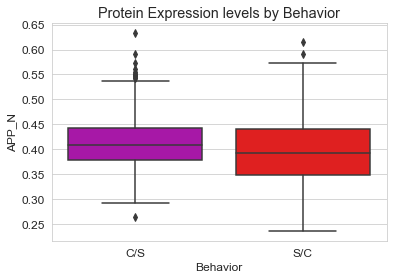

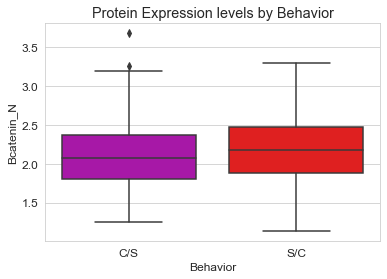

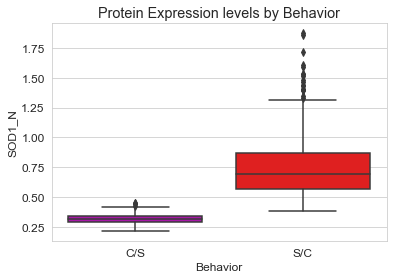

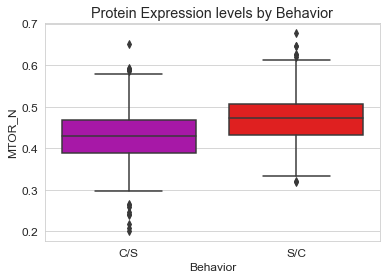

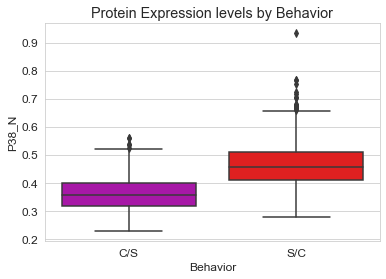

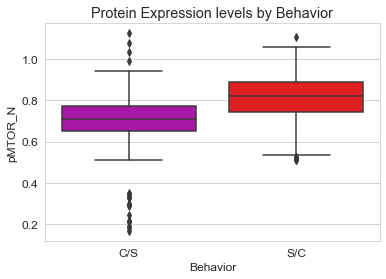

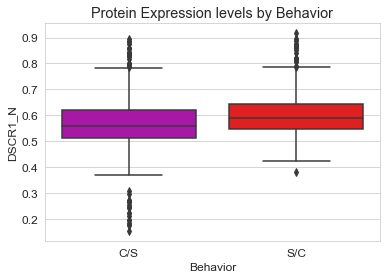

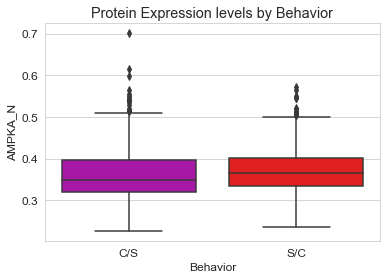

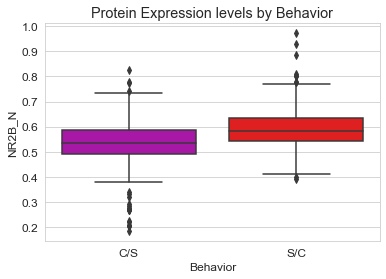

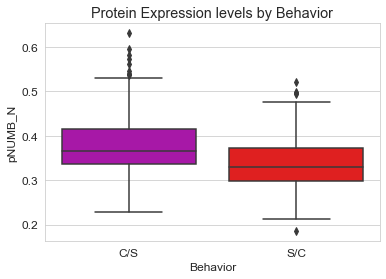

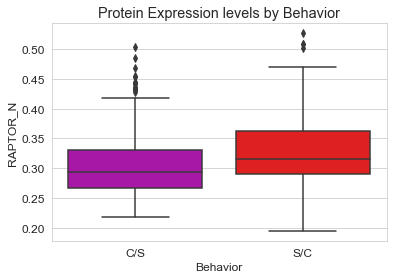

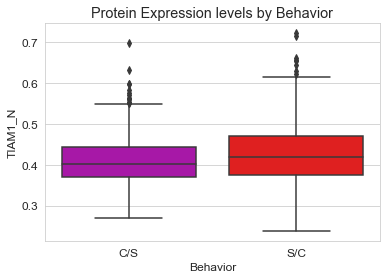

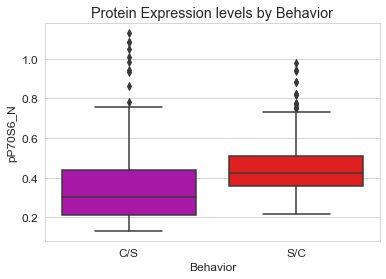

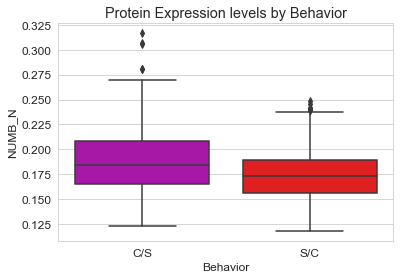

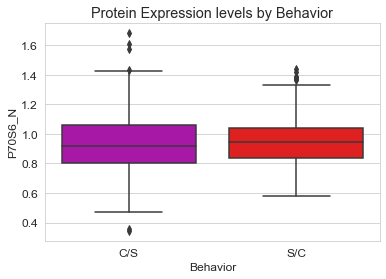

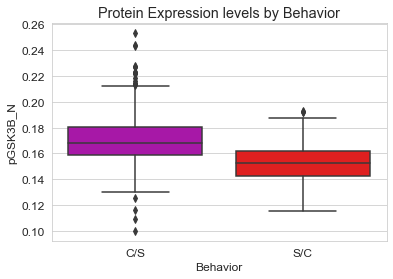

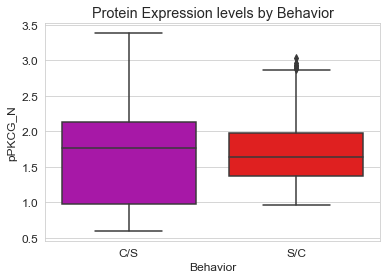

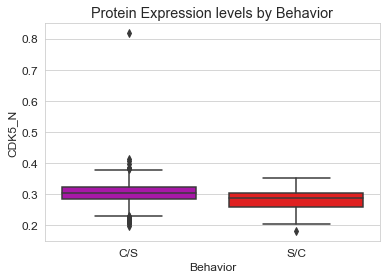

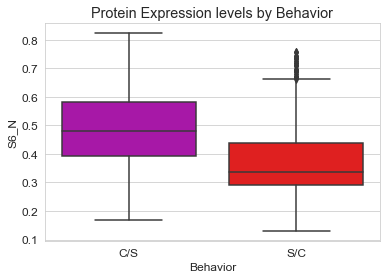

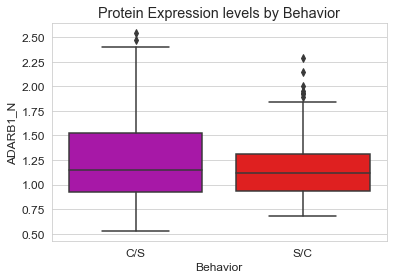

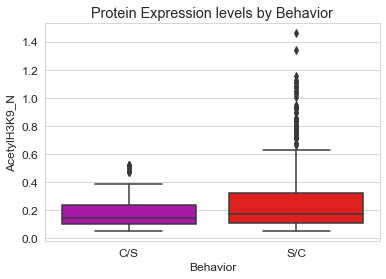

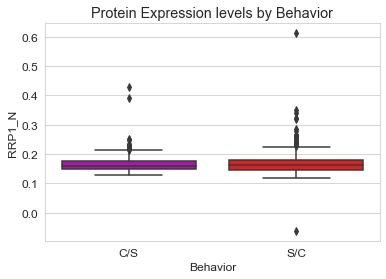

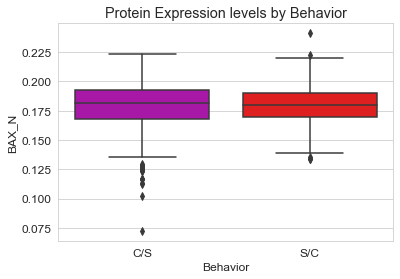

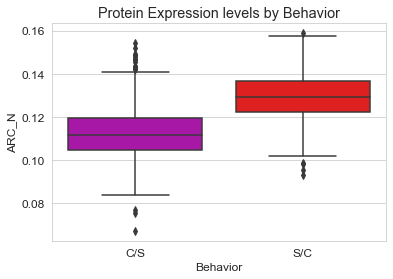

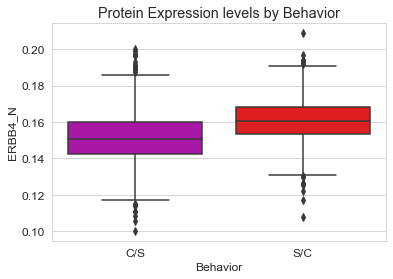

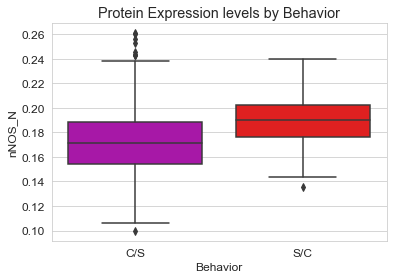

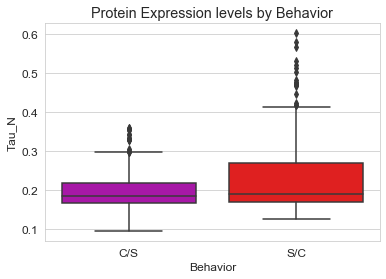

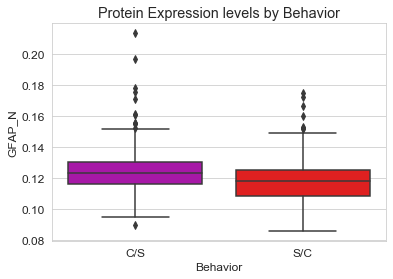

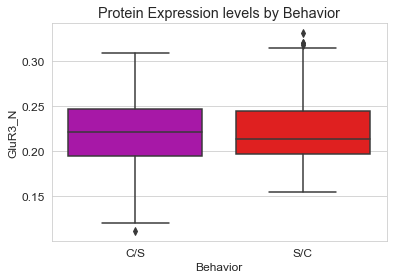

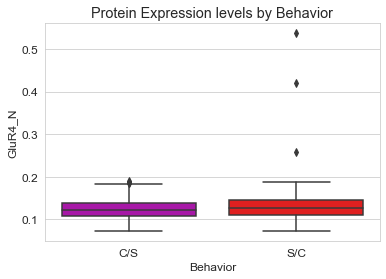

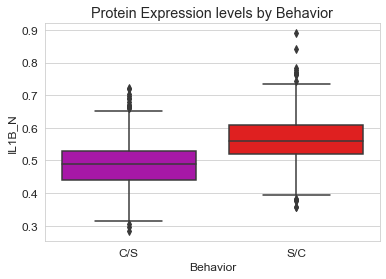

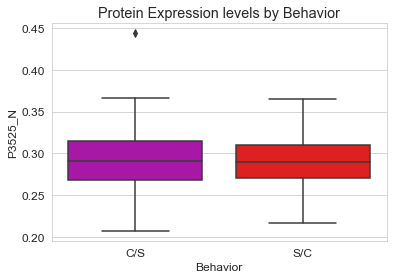

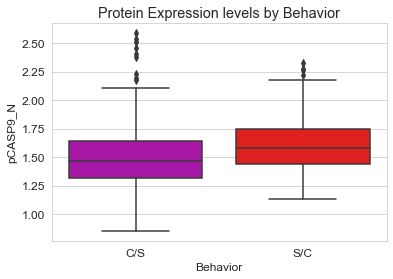

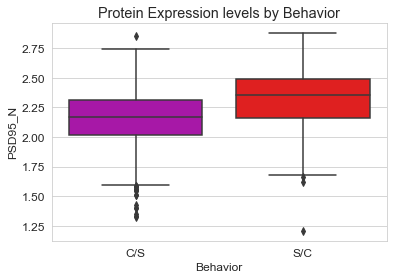

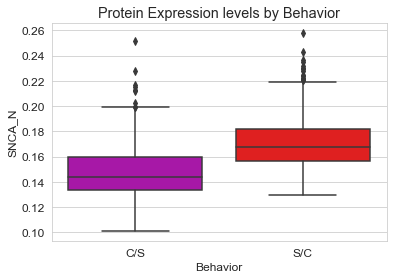

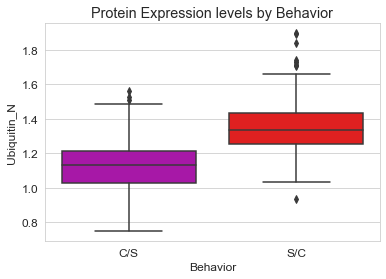

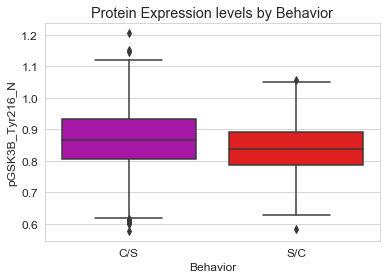

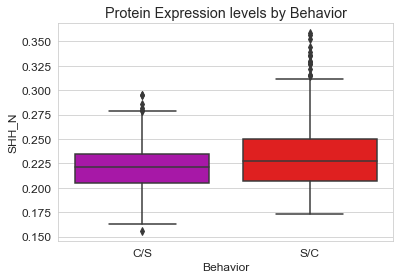

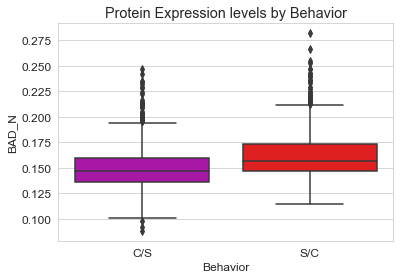

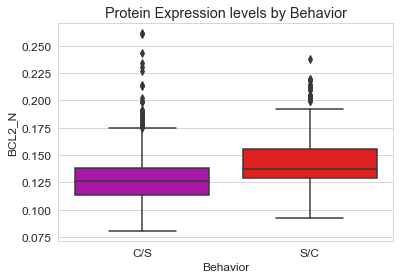

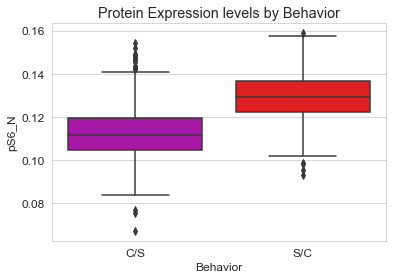

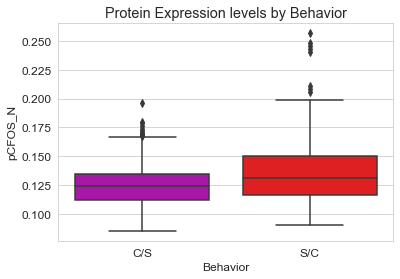

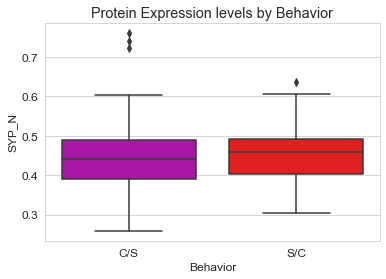

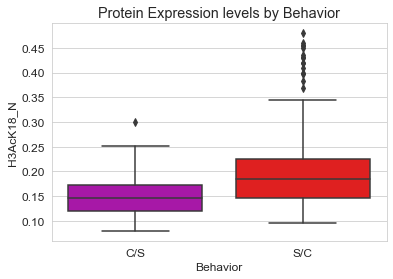

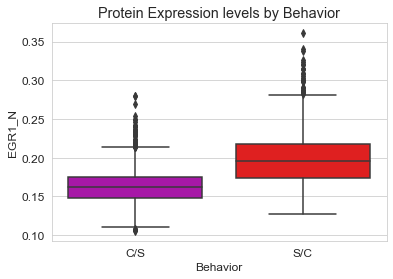

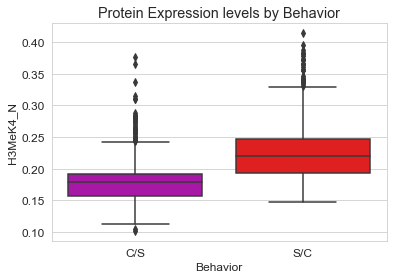

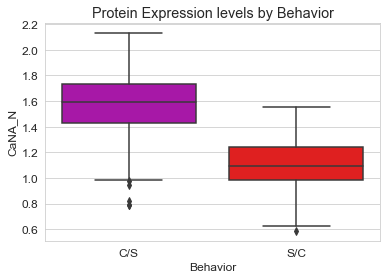

In [39]:
# Boxplot to show expression levels of each protiens by Behavior 

proteins = raw_df.columns[0:77]

my_pal = {"C/S": "m", "S/C": "r"}

for p in proteins:
    sns.boxplot(data = raw_df, x = 'Behavior', y = p, palette=my_pal).set_title("Protein Expression levels by Behavior")
    
    plt.show()

Examine specific proteins in depth where values are significnat amongst others, eg. large range of outliers, large range of values. 


1. Examining protein NR2A_N because its' range value is the biggest and shows significant difference from other proteins.

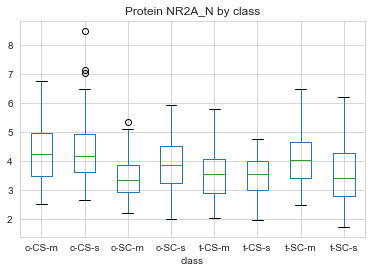

Average expression level for c-CS-s:  4.280077157237036
Average expression level for c-CS-m:  4.308540480286666
Average expression level for t-CS-s:  3.514838515009523
Average expression level for t-CS-m:  3.5659597895407407
Average expression level for c-SC-s:  3.9130963497703704
Average expression level for c-SC-m:  3.4594158348533353
Average expression level for t-SC-s:  3.5650929187045466
Average expression level for t-SC-m:  4.0562230260370375


In [38]:
# Creating boxplot for protien by class

raw_df.boxplot(column='NR2A_N', by ='class')
plt.title('Protein NR2A_N by class')
plt.rcParams.update({'font.size': 12})
plt.suptitle("")

plt.show()

# Calculating mean expression level by class
class1 = raw_df[raw_df['class'] == 'c-CS-s']
class2 = raw_df[raw_df['class'] == 'c-CS-m']
class3 = raw_df[raw_df['class'] == 't-CS-s']
class4 = raw_df[raw_df['class'] == 't-CS-m']
class5 = raw_df[raw_df['class'] == 'c-SC-s']
class6 = raw_df[raw_df['class'] == 'c-SC-m']
class7 = raw_df[raw_df['class'] == 't-SC-s']
class8 = raw_df[raw_df['class'] == 't-SC-m']

class_mean1 = class1.loc[:,'NR2A_N'].mean()
class_mean2 = class2.loc[:,'NR2A_N'].mean()
class_mean3 = class3.loc[:,'NR2A_N'].mean()
class_mean4 = class4.loc[:,'NR2A_N'].mean()
class_mean5 = class5.loc[:,'NR2A_N'].mean()
class_mean6 = class6.loc[:,'NR2A_N'].mean()
class_mean7 = class7.loc[:,'NR2A_N'].mean()
class_mean8 = class8.loc[:,'NR2A_N'].mean()


print("Average expression level for c-CS-s: ", class_mean1)
print("Average expression level for c-CS-m: ", class_mean2)
print("Average expression level for t-CS-s: ", class_mean3)
print("Average expression level for t-CS-m: ", class_mean4)
print("Average expression level for c-SC-s: ", class_mean5)
print("Average expression level for c-SC-m: ", class_mean6)
print("Average expression level for t-SC-s: ", class_mean7)
print("Average expression level for t-SC-m: ", class_mean8)

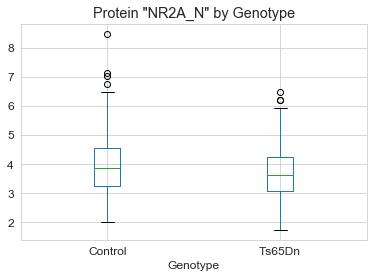

Average expression level for Control type:  3.9846874924859668
Average expression level for Ts65Dn type:  3.684980918047282


In [40]:
# Creating boxplot for protien by Genotyp

raw_df.boxplot(column='NR2A_N', by ='Genotype')
plt.title('Protein "NR2A_N" by Genotype')
plt.rcParams.update({'font.size': 12})
plt.suptitle("")

plt.show()


#Calculating mean expression level by Genotype
genotype1 = raw_df[raw_df['Genotype'] == 'Control']
genotype2 = raw_df[raw_df['Genotype'] == 'Ts65Dn']

pc_gen_mean = genotype1.loc[:,'NR2A_N'].mean()
pc_gen_mean2 = genotype2.loc[:,'NR2A_N'].mean()

print("Average expression level for Control type: ", pc_gen_mean)
print("Average expression level for Ts65Dn type: ", pc_gen_mean2)

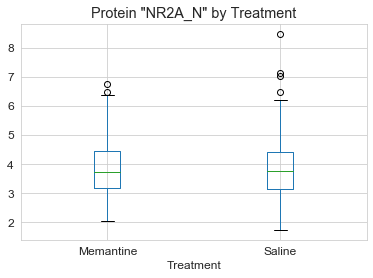

Average expression level for Memantine treated mice:  3.8494528550421045
Average expression level for Saline treated mice:  3.836125512837478


In [41]:
# To create boxplot for protin vs Treatment

raw_df.boxplot(column='NR2A_N', by ='Treatment')
plt.title('Protein "NR2A_N" by Treatment')
plt.rcParams.update({'font.size': 12})
plt.suptitle("")

plt.show()

# Calculating mean expression level by treatment 
treatment1 = raw_df[raw_df['Treatment'] == 'Memantine']
treatment2 = raw_df[raw_df['Treatment'] == 'Saline']

pc_treat_mean = treatment1.loc[:,'NR2A_N'].mean()
pc_treat_mean2 = treatment2.loc[:,'NR2A_N'].mean()

print("Average expression level for Memantine treated mice: ", pc_treat_mean)
print("Average expression level for Saline treated mice: ", pc_treat_mean2)

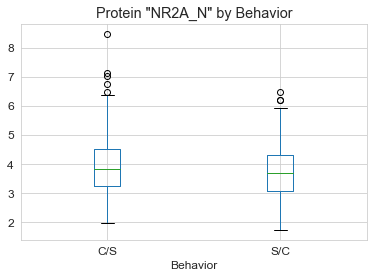

Average expression level for C/S mice:  3.9515316265409544
Average expression level for S/C mice:  3.7406451080848897


In [42]:
# Boxplot showing protein vs Behaviour

raw_df.boxplot(column='NR2A_N', by ='Behavior')
plt.title('Protein "NR2A_N" by Behavior')
plt.rcParams.update({'font.size': 12})
plt.suptitle("")

plt.show()


# Mean expression level by behaviour
behavior1 = raw_df[raw_df['Behavior'] == 'C/S']
behavior2 = raw_df[raw_df['Behavior'] == 'S/C']

pc_behav_mean = behavior1.loc[:,'NR2A_N'].mean()
pc_behav_mean2 = behavior2.loc[:,'NR2A_N'].mean()

print("Average expression level for C/S mice: ", pc_behav_mean)
print("Average expression level for S/C mice: ", pc_behav_mean2)

2. Examining protien pCAMKII_N as it also has large range

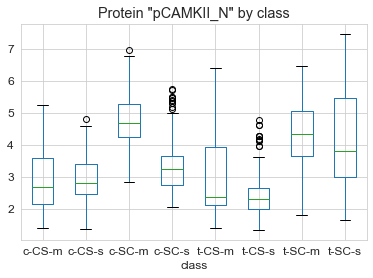

Average expression level for c-CS-s:  2.9355762011407394
Average expression level for c-CS-m:  2.9161866893000004
Average expression level for t-CS-s:  2.4889019605523814
Average expression level for t-CS-m:  3.1218007785925908
Average expression level for c-SC-s:  3.361287609599999
Average expression level for c-SC-m:  4.736327186393334
Average expression level for t-SC-s:  4.176555170030303
Average expression level for t-SC-m:  4.277257152429627


In [43]:
raw_df.boxplot(column='pCAMKII_N', by ='class')
plt.title('Protein "pCAMKII_N" by class')
plt.rcParams.update({'font.size': 12})
plt.suptitle("")

plt.show()


class1 = raw_df[raw_df['class'] == 'c-CS-s']
class2 = raw_df[raw_df['class'] == 'c-CS-m']
class3 = raw_df[raw_df['class'] == 't-CS-s']
class4 = raw_df[raw_df['class'] == 't-CS-m']
class5 = raw_df[raw_df['class'] == 'c-SC-s']
class6 = raw_df[raw_df['class'] == 'c-SC-m']
class7 = raw_df[raw_df['class'] == 't-SC-s']
class8 = raw_df[raw_df['class'] == 't-SC-m']

class_mean1 = class1.loc[:,'pCAMKII_N'].mean()
class_mean2 = class2.loc[:,'pCAMKII_N'].mean()
class_mean3 = class3.loc[:,'pCAMKII_N'].mean()
class_mean4 = class4.loc[:,'pCAMKII_N'].mean()
class_mean5 = class5.loc[:,'pCAMKII_N'].mean()
class_mean6 = class6.loc[:,'pCAMKII_N'].mean()
class_mean7 = class7.loc[:,'pCAMKII_N'].mean()
class_mean8 = class8.loc[:,'pCAMKII_N'].mean()


print("Average expression level for c-CS-s: ", class_mean1)
print("Average expression level for c-CS-m: ", class_mean2)
print("Average expression level for t-CS-s: ", class_mean3)
print("Average expression level for t-CS-m: ", class_mean4)
print("Average expression level for c-SC-s: ", class_mean5)
print("Average expression level for c-SC-m: ", class_mean6)
print("Average expression level for t-SC-s: ", class_mean7)
print("Average expression level for t-SC-m: ", class_mean8)

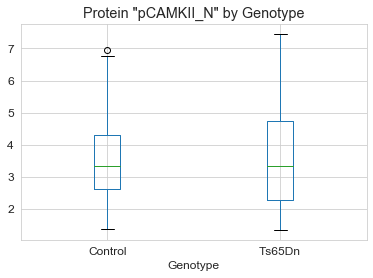

Average expression level for Control type:  3.5051819224631546
Average expression level for Ts65Dn type:  3.5765538715688026


In [44]:
raw_df.boxplot(column='pCAMKII_N', by ='Genotype')
plt.title('Protein "pCAMKII_N" by Genotype')
plt.rcParams.update({'font.size': 12})
plt.suptitle("")

plt.show()

genotype1 = raw_df[raw_df['Genotype'] == 'Control']
genotype2 = raw_df[raw_df['Genotype'] == 'Ts65Dn']

pc_gen_mean = genotype1.loc[:,'pCAMKII_N'].mean()
pc_gen_mean2 = genotype2.loc[:,'pCAMKII_N'].mean()

print("Average expression level for Control type: ", pc_gen_mean)
print("Average expression level for Ts65Dn type: ", pc_gen_mean2)

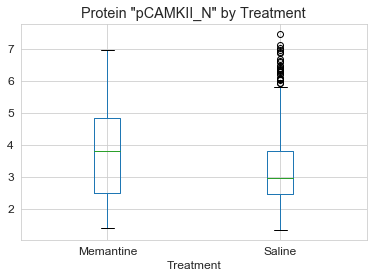

Average expression level for Memantine treated mice:  3.7662278983192965
Average expression level for Saline treated mice:  3.284796604435468


In [45]:
raw_df.boxplot(column='pCAMKII_N', by ='Treatment')
plt.title('Protein "pCAMKII_N" by Treatment')
plt.rcParams.update({'font.size': 12})
plt.suptitle("")

plt.show()

treatment1 = raw_df[raw_df['Treatment'] == 'Memantine']
treatment2 = raw_df[raw_df['Treatment'] == 'Saline']

treat_mean = treatment1.loc[:,'pCAMKII_N'].mean()
treat_mean2 = treatment2.loc[:,'pCAMKII_N'].mean()

print("Average expression level for Memantine treated mice: ", treat_mean)
print("Average expression level for Saline treated mice: ", treat_mean2)

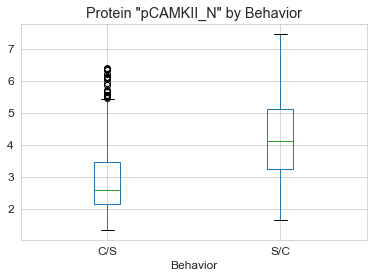

Average expression level for C/S mice:  2.8885878124133346
Average expression level for S/C mice:  4.154031655472233


In [46]:
raw_df.boxplot(column='pCAMKII_N', by ='Behavior')
plt.title('Protein "pCAMKII_N" by Behavior')
plt.rcParams.update({'font.size': 12})
plt.suptitle("")

plt.show()

behavior1 = raw_df[raw_df['Behavior'] == 'C/S']
behavior2 = raw_df[raw_df['Behavior'] == 'S/C']

pc_behav_mean = behavior1.loc[:,'pCAMKII_N'].mean()
pc_behav_mean2 = behavior2.loc[:,'pCAMKII_N'].mean()

print("Average expression level for C/S mice: ", pc_behav_mean)
print("Average expression level for S/C mice: ", pc_behav_mean2)

3. Examining protein GFAP_N because its' range value is the smallest

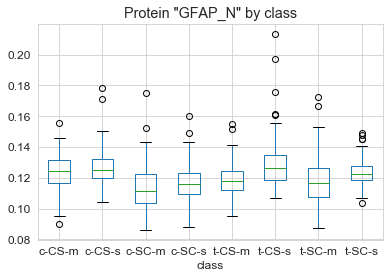

Average expression level for c-CS-s:  0.12702558271851852
Average expression level for c-CS-m:  0.12372220431999999
Average expression level for t-CS-s:  0.1293242654952381
Average expression level for t-CS-m:  0.11809868846666667
Average expression level for c-SC-s:  0.11662285280740738
Average expression level for c-SC-m:  0.1138335006666666
Average expression level for t-SC-s:  0.12313760952592592
Average expression level for t-SC-m:  0.11769212777037036


In [47]:
raw_df.boxplot(column='GFAP_N', by ='class')
plt.title('Protein "GFAP_N" by class')
plt.rcParams.update({'font.size': 12})
plt.suptitle("")

plt.show()

class1 = raw_df[raw_df['class'] == 'c-CS-s']
class2 = raw_df[raw_df['class'] == 'c-CS-m']
class3 = raw_df[raw_df['class'] == 't-CS-s']
class4 = raw_df[raw_df['class'] == 't-CS-m']
class5 = raw_df[raw_df['class'] == 'c-SC-s']
class6 = raw_df[raw_df['class'] == 'c-SC-m']
class7 = raw_df[raw_df['class'] == 't-SC-s']
class8 = raw_df[raw_df['class'] == 't-SC-m']

class_mean1 = class1.loc[:,'GFAP_N'].mean()
class_mean2 = class2.loc[:,'GFAP_N'].mean()
class_mean3 = class3.loc[:,'GFAP_N'].mean()
class_mean4 = class4.loc[:,'GFAP_N'].mean()
class_mean5 = class5.loc[:,'GFAP_N'].mean()
class_mean6 = class6.loc[:,'GFAP_N'].mean()
class_mean7 = class7.loc[:,'GFAP_N'].mean()
class_mean8 = class8.loc[:,'GFAP_N'].mean()


print("Average expression level for c-CS-s: ", class_mean1)
print("Average expression level for c-CS-m: ", class_mean2)
print("Average expression level for t-CS-s: ", class_mean3)
print("Average expression level for t-CS-m: ", class_mean4)
print("Average expression level for c-SC-s: ", class_mean5)
print("Average expression level for c-SC-m: ", class_mean6)
print("Average expression level for t-SC-s: ", class_mean7)
print("Average expression level for t-SC-m: ", class_mean8)

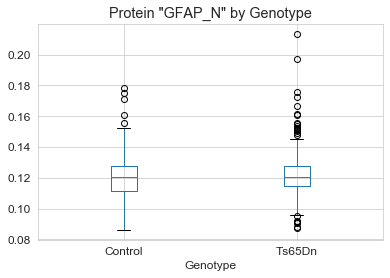

Average expression level for Control type:  0.1202208676210528
Average expression level for Ts65Dn type:  0.12163604971568631


In [48]:
raw_df.boxplot(column='GFAP_N', by ='Genotype')
plt.title('Protein "GFAP_N" by Genotype')
plt.rcParams.update({'font.size': 12})
plt.suptitle("")
plt_manager.save_last_plt()

plt.show()


genotype1 = raw_df[raw_df['Genotype'] == 'Control']
genotype2 = raw_df[raw_df['Genotype'] == 'Ts65Dn']

pc_gen_mean = genotype1.loc[:,'GFAP_N'].mean()
pc_gen_mean2 = genotype2.loc[:,'GFAP_N'].mean()

print("Average expression level for Control type: ", pc_gen_mean)
print("Average expression level for Ts65Dn type: ", pc_gen_mean2)

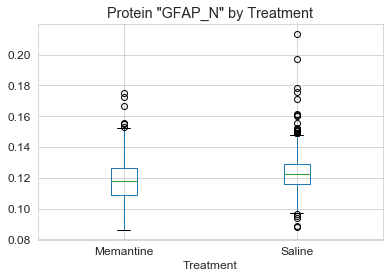

Average expression level for Memantine treated mice:  0.11835985252631577
Average expression level for Saline treated mice:  0.1237160077627452


In [49]:
raw_df.boxplot(column='GFAP_N', by ='Treatment')
plt.title('Protein "GFAP_N" by Treatment')
plt.rcParams.update({'font.size': 12})
plt.suptitle("")
plt_manager.save_last_plt()

plt.show()

treatment1 = raw_df[raw_df['Treatment'] == 'Memantine']
treatment2 = raw_df[raw_df['Treatment'] == 'Saline']

treat_mean = treatment1.loc[:,'GFAP_N'].mean()
treat_mean2 = treatment2.loc[:,'GFAP_N'].mean()

print("Average expression level for Memantine treated mice: ", treat_mean)
print("Average expression level for Saline treated mice: ", treat_mean2)

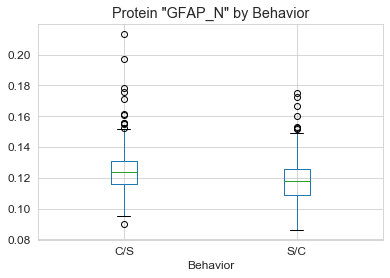

Average expression level for C/S mice:  0.12424600978095235
Average expression level for S/C mice:  0.1177137383135136


In [50]:
raw_df.boxplot(column='GFAP_N', by ='Behavior')
plt.title('Protein "GFAP_N" by Behavior')
plt.rcParams.update({'font.size': 12})
plt.suptitle("")
plt_manager.save_last_plt()

plt.show()


behavior1 = raw_df[raw_df['Behavior'] == 'C/S']
behavior2 = raw_df[raw_df['Behavior'] == 'S/C']

pc_behav_mean = behavior1.loc[:,'GFAP_N'].mean()
pc_behav_mean2 = behavior2.loc[:,'GFAP_N'].mean()

print("Average expression level for C/S mice: ", pc_behav_mean)
print("Average expression level for S/C mice: ", pc_behav_mean2)

3. Examining protein RRP1_N because it has negative values.

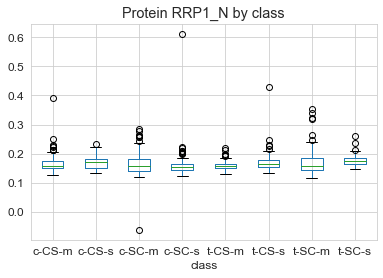

Average expression level for c-CS-s:  0.16908220505925917
Average expression level for c-CS-m:  0.16439165985333337
Average expression level for t-CS-s:  0.1707746795714286
Average expression level for t-CS-m:  0.1582329835333334
Average expression level for c-SC-s:  0.15979607337037033
Average expression level for c-SC-m:  0.1651962994866666
Average expression level for t-SC-s:  0.1764825800592593
Average expression level for t-SC-m:  0.17042248421481468


In [51]:
raw_df.boxplot(column='RRP1_N', by ='class')
plt.title('Protein RRP1_N by class')
plt.rcParams.update({'font.size': 12})
plt.suptitle("")


plt.show()


class1 = raw_df[raw_df['class'] == 'c-CS-s']
class2 = raw_df[raw_df['class'] == 'c-CS-m']
class3 = raw_df[raw_df['class'] == 't-CS-s']
class4 = raw_df[raw_df['class'] == 't-CS-m']
class5 = raw_df[raw_df['class'] == 'c-SC-s']
class6 = raw_df[raw_df['class'] == 'c-SC-m']
class7 = raw_df[raw_df['class'] == 't-SC-s']
class8 = raw_df[raw_df['class'] == 't-SC-m']

class_mean1 = class1.loc[:,'RRP1_N'].mean()
class_mean2 = class2.loc[:,'RRP1_N'].mean()
class_mean3 = class3.loc[:,'RRP1_N'].mean()
class_mean4 = class4.loc[:,'RRP1_N'].mean()
class_mean5 = class5.loc[:,'RRP1_N'].mean()
class_mean6 = class6.loc[:,'RRP1_N'].mean()
class_mean7 = class7.loc[:,'RRP1_N'].mean()
class_mean8 = class8.loc[:,'RRP1_N'].mean()


print("Average expression level for c-CS-s: ", class_mean1)
print("Average expression level for c-CS-m: ", class_mean2)
print("Average expression level for t-CS-s: ", class_mean3)
print("Average expression level for t-CS-m: ", class_mean4)
print("Average expression level for c-SC-s: ", class_mean5)
print("Average expression level for c-SC-m: ", class_mean6)
print("Average expression level for t-SC-s: ", class_mean7)
print("Average expression level for t-SC-m: ", class_mean8)

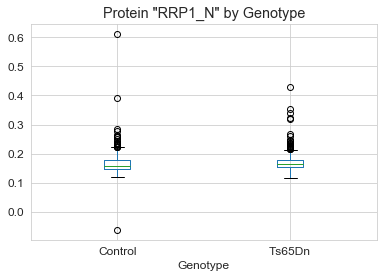

Average expression level for Control type:  0.16462589734912278
Average expression level for Ts65Dn type:  0.16887250550784333


In [52]:
raw_df.boxplot(column='RRP1_N', by ='Genotype')
plt.title('Protein "RRP1_N" by Genotype')
plt.rcParams.update({'font.size': 12})
plt.suptitle("")
plt_manager.save_last_plt()

plt.show()

genotype1 = raw_df[raw_df['Genotype'] == 'Control']
genotype2 = raw_df[raw_df['Genotype'] == 'Ts65Dn']

pc_gen_mean = genotype1.loc[:,'RRP1_N'].mean()
pc_gen_mean2 = genotype2.loc[:,'RRP1_N'].mean()

print("Average expression level for Control type: ", pc_gen_mean)
print("Average expression level for Ts65Dn type: ", pc_gen_mean2)

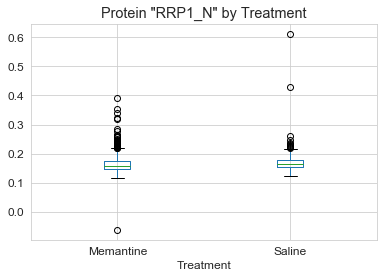

Average expression level for Memantine treated mice:  0.16457312639824562
Average expression level for Saline treated mice:  0.1689314848058825


In [53]:
raw_df.boxplot(column='RRP1_N', by ='Treatment')
plt.title('Protein "RRP1_N" by Treatment')
plt.rcParams.update({'font.size': 12})
plt.suptitle("")
plt_manager.save_last_plt()

plt.show()

treatment1 = raw_df[raw_df['Treatment'] == 'Memantine']
treatment2 = raw_df[raw_df['Treatment'] == 'Saline']

treat_mean = treatment1.loc[:,'RRP1_N'].mean()
treat_mean2 = treatment2.loc[:,'RRP1_N'].mean()

print("Average expression level for Memantine treated mice: ", treat_mean)
print("Average expression level for Saline treated mice: ", treat_mean2)

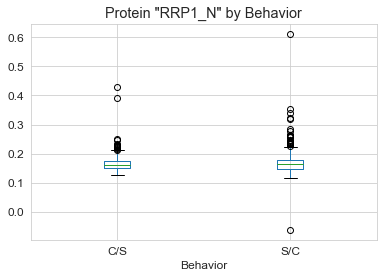

Average expression level for C/S mice:  0.1652907443676189
Average expression level for S/C mice:  0.16789927658558562


In [54]:
raw_df.boxplot(column='RRP1_N', by ='Behavior')
plt.title('Protein "RRP1_N" by Behavior')
plt.rcParams.update({'font.size': 12})
plt.suptitle("")

plt.show()


behavior1 = raw_df[raw_df['Behavior'] == 'C/S']
behavior2 = raw_df[raw_df['Behavior'] == 'S/C']

pc_behav_mean = behavior1.loc[:,'RRP1_N'].mean()
pc_behav_mean2 = behavior2.loc[:,'RRP1_N'].mean()

print("Average expression level for C/S mice: ", pc_behav_mean)
print("Average expression level for S/C mice: ", pc_behav_mean2)

4.  Protien DYRK1A_N which has significant outlier


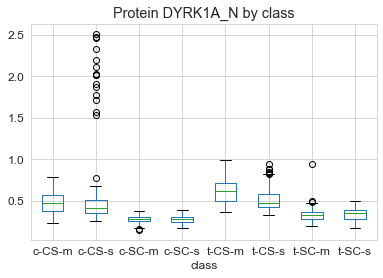

Average expression level for c-CS-s:  0.5967483166444446
Average expression level for c-CS-m:  0.48045641765999997
Average expression level for t-CS-s:  0.5257349665809523
Average expression level for t-CS-m:  0.6192939260370374
Average expression level for c-SC-s:  0.2748234049555555
Average expression level for c-SC-m:  0.2732029416066666
Average expression level for t-SC-s:  0.3374879959696969
Average expression level for t-SC-m:  0.32986068277037045


In [56]:
raw_df.boxplot(column='DYRK1A_N', by ='class')
plt.title('Protein DYRK1A_N by class')
plt.rcParams.update({'font.size': 12})
plt.suptitle("")

plt.show()


class1 = raw_df[raw_df['class'] == 'c-CS-s']
class2 = raw_df[raw_df['class'] == 'c-CS-m']
class3 = raw_df[raw_df['class'] == 't-CS-s']
class4 = raw_df[raw_df['class'] == 't-CS-m']
class5 = raw_df[raw_df['class'] == 'c-SC-s']
class6 = raw_df[raw_df['class'] == 'c-SC-m']
class7 = raw_df[raw_df['class'] == 't-SC-s']
class8 = raw_df[raw_df['class'] == 't-SC-m']

class_mean1 = class1.loc[:,'DYRK1A_N'].mean()
class_mean2 = class2.loc[:,'DYRK1A_N'].mean()
class_mean3 = class3.loc[:,'DYRK1A_N'].mean()
class_mean4 = class4.loc[:,'DYRK1A_N'].mean()
class_mean5 = class5.loc[:,'DYRK1A_N'].mean()
class_mean6 = class6.loc[:,'DYRK1A_N'].mean()
class_mean7 = class7.loc[:,'DYRK1A_N'].mean()
class_mean8 = class8.loc[:,'DYRK1A_N'].mean()


print("Average expression level for c-CS-s: ", class_mean1)
print("Average expression level for c-CS-m: ", class_mean2)
print("Average expression level for t-CS-s: ", class_mean3)
print("Average expression level for t-CS-m: ", class_mean4)
print("Average expression level for c-SC-s: ", class_mean5)
print("Average expression level for c-SC-m: ", class_mean6)
print("Average expression level for t-SC-s: ", class_mean7)
print("Average expression level for t-SC-m: ", class_mean8)


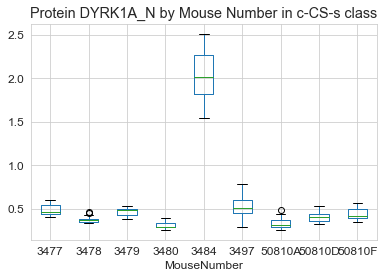

In [57]:
raw1=raw_df.loc[raw_df['class'] == 'c-CS-s']

raw1.boxplot(column='DYRK1A_N', by ='MouseNumber')
plt.title('Protein DYRK1A_N by Mouse Number in c-CS-s class')
plt.rcParams.update({'font.size': 12})
plt.suptitle("")

plt.show()


5. Protein AcetylH3K9_N explored as it also has large outliers


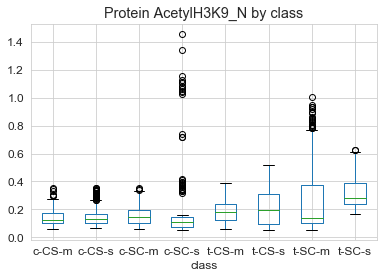

Average expression level for c-CS-s:  0.1593513617185185
Average expression level for c-CS-m:  0.14940519252666665
Average expression level for t-CS-s:  0.21529209960000006
Average expression level for t-CS-m:  0.191515840437037
Average expression level for c-SC-s:  0.2357632603111111
Average expression level for c-SC-m:  0.1553002054533333
Average expression level for t-SC-s:  0.3394414470148149
Average expression level for t-SC-m:  0.2997748032888889


In [59]:
raw_df.boxplot(column='AcetylH3K9_N', by ='class')
plt.title('Protein AcetylH3K9_N by class')
plt.rcParams.update({'font.size': 12})
plt.suptitle("")


plt.show()

class1 = raw_df[raw_df['class'] == 'c-CS-s']
class2 = raw_df[raw_df['class'] == 'c-CS-m']
class3 = raw_df[raw_df['class'] == 't-CS-s']
class4 = raw_df[raw_df['class'] == 't-CS-m']
class5 = raw_df[raw_df['class'] == 'c-SC-s']
class6 = raw_df[raw_df['class'] == 'c-SC-m']
class7 = raw_df[raw_df['class'] == 't-SC-s']
class8 = raw_df[raw_df['class'] == 't-SC-m']

class_mean1 = class1.loc[:,'AcetylH3K9_N'].mean()
class_mean2 = class2.loc[:,'AcetylH3K9_N'].mean()
class_mean3 = class3.loc[:,'AcetylH3K9_N'].mean()
class_mean4 = class4.loc[:,'AcetylH3K9_N'].mean()
class_mean5 = class5.loc[:,'AcetylH3K9_N'].mean()
class_mean6 = class6.loc[:,'AcetylH3K9_N'].mean()
class_mean7 = class7.loc[:,'AcetylH3K9_N'].mean()
class_mean8 = class8.loc[:,'AcetylH3K9_N'].mean()


print("Average expression level for c-CS-s: ", class_mean1)
print("Average expression level for c-CS-m: ", class_mean2)
print("Average expression level for t-CS-s: ", class_mean3)
print("Average expression level for t-CS-m: ", class_mean4)
print("Average expression level for c-SC-s: ", class_mean5)
print("Average expression level for c-SC-m: ", class_mean6)
print("Average expression level for t-SC-s: ", class_mean7)
print("Average expression level for t-SC-m: ", class_mean8)


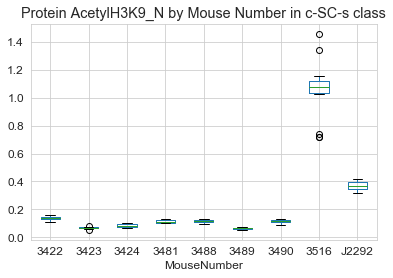

In [60]:
raw1=raw_df.loc[raw_df['class'] == 'c-SC-s']

raw1.boxplot(column='AcetylH3K9_N', by ='MouseNumber')
plt.title('Protein AcetylH3K9_N by Mouse Number in c-SC-s class')
plt.rcParams.update({'font.size': 12})
plt.suptitle("")

plt.show()

Task 3: Data Modelling - KNN

In [61]:
# Importing packages required for data modelling

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [62]:
mouseid = ['MouseNumber','MouseRegisterNo']
class_labels = ['Genotype','Treatment','Behavior','class']
class_class = ['class']

# data with target variables
df_target = raw_df[class_class] 

# data with the protein expression levels
df_data = raw_df.drop(class_labels+mouseid, axis=1) 

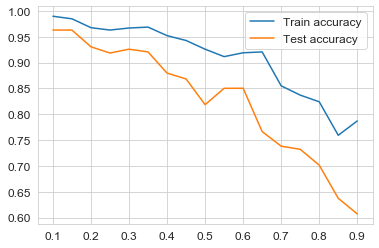

In [63]:
# To check for best test size

knn = KNeighborsClassifier()

size = [0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9]
results = {}
for i in size: 
    
    X_train, X_test, y_train, y_test = train_test_split(df_data, df_target, test_size = i)
    knn.fit(X_train,y_train.values.ravel())
    
    test=knn.score(X_test,y_test)
    train=knn.score(X_train,y_train)
    
    results[i]=train,test

size_df=pd.DataFrame(results).transpose()
size_df.columns=['Train accuracy','Test accuracy']

size_df.plot()

In [64]:
# Splitting test and train data
X_train, X_test, y_train, y_test = train_test_split(df_data,df_target,test_size = 0.15, random_state=0)

In [65]:
X_train.shape

(918, 77)

In [66]:
y_train.shape

(918, 1)

In [67]:
X_test.shape

(162, 77)

In [68]:
y_test.shape

(162, 1)

In [71]:
#set KFlod cross validation using 10 fold
from sklearn.model_selection import KFold
kf = KFold(n_splits=10,random_state=19, shuffle=True)

In [73]:
#run the KFlod cross validation

clf = KNeighborsClassifier(10)

for k, (train_index, test_index) in enumerate(kf.split(df_data)):
 
    X_train, X_test = df_data.iloc[train_index], df_data.iloc[test_index]
    y_train, y_test = df_target.iloc[train_index], df_target.iloc[test_index]
    
    clf.fit(X_train, y_train.values.ravel())

    print("[fold {0}] score: {1:.5f}".format(k, clf.score(X_test, y_test)))
    
# Average score: 0.891669

[fold 0] score: 0.85185
[fold 1] score: 0.91667
[fold 2] score: 0.92593
[fold 3] score: 0.92593
[fold 4] score: 0.87963
[fold 5] score: 0.90741
[fold 6] score: 0.91667
[fold 7] score: 0.89815
[fold 8] score: 0.77778
[fold 9] score: 0.91667


In [74]:
#run the KFlod cross validation

clf = KNeighborsClassifier(5)

for k, (train_index, test_index) in enumerate(kf.split(df_data)):
 
    X_train, X_test = df_data.iloc[train_index], df_data.iloc[test_index]
    y_train, y_test = df_target.iloc[train_index], df_target.iloc[test_index]
    
    clf.fit(X_train, y_train.values.ravel())

    print("[fold {0}] score: {1:.5f}".format(k, clf.score(X_test, y_test)))
    
# Average score: 0.944445

[fold 0] score: 0.93519
[fold 1] score: 0.91667
[fold 2] score: 0.95370
[fold 3] score: 0.96296
[fold 4] score: 0.92593
[fold 5] score: 0.93519
[fold 6] score: 0.97222
[fold 7] score: 0.95370
[fold 8] score: 0.91667
[fold 9] score: 0.97222


In [75]:
#run the KFlod cross validation for parameter tunning

clf = KNeighborsClassifier(3)

for k, (train_index, test_index) in enumerate(kf.split(df_data)):
 
    X_train, X_test = df_data.iloc[train_index], df_data.iloc[test_index]
    y_train, y_test = df_target.iloc[train_index], df_target.iloc[test_index]
    
    clf.fit(X_train, y_train.values.ravel())

    print("[fold {0}] score: {1:.5f}".format(k, clf.score(X_test, y_test)))
    
# Average score: 0.978702

[fold 0] score: 0.97222
[fold 1] score: 0.97222
[fold 2] score: 0.99074
[fold 3] score: 1.00000
[fold 4] score: 0.96296
[fold 5] score: 0.98148
[fold 6] score: 0.98148
[fold 7] score: 0.98148
[fold 8] score: 0.95370
[fold 9] score: 0.99074


In [76]:
#run the KFlod cross validation for parameter tunning

clf = KNeighborsClassifier(10, weights='distance')

for k, (train_index, test_index) in enumerate(kf.split(df_data)):
 
    X_train, X_test = df_data.iloc[train_index], df_data.iloc[test_index]
    y_train, y_test = df_target.iloc[train_index], df_target.iloc[test_index]
    
    clf.fit(X_train, y_train.values.ravel())

    print("[fold {0}] score: {1:.5f}".format(k, clf.score(X_test, y_test)))
    
# Average score: 0.959258

[fold 0] score: 0.92593
[fold 1] score: 0.98148
[fold 2] score: 0.98148
[fold 3] score: 0.99074
[fold 4] score: 0.94444
[fold 5] score: 0.97222
[fold 6] score: 0.99074
[fold 7] score: 0.95370
[fold 8] score: 0.88889
[fold 9] score: 0.96296


In [77]:
#run the KFlod cross validation for parameter tunning

clf = KNeighborsClassifier(10, p=1)

for k, (train_index, test_index) in enumerate(kf.split(df_data)):
 
    X_train, X_test = df_data.iloc[train_index], df_data.iloc[test_index]
    y_train, y_test = df_target.iloc[train_index], df_target.iloc[test_index]
    
    clf.fit(X_train, y_train.values.ravel())

    print("[fold {0}] score: {1:.5f}".format(k, clf.score(X_test, y_test)))
    
# Average score: 0.920371

[fold 0] score: 0.91667
[fold 1] score: 0.90741
[fold 2] score: 0.89815
[fold 3] score: 0.92593
[fold 4] score: 0.91667
[fold 5] score: 0.95370
[fold 6] score: 0.95370
[fold 7] score: 0.90741
[fold 8] score: 0.87037
[fold 9] score: 0.95370


In [78]:
#run the KFlod cross validation for parameter tunning

clf = KNeighborsClassifier(10, weights='distance', p=1)

for k, (train_index, test_index) in enumerate(kf.split(df_data)):
 
    X_train, X_test = df_data.iloc[train_index], df_data.iloc[test_index]
    y_train, y_test = df_target.iloc[train_index], df_target.iloc[test_index]
    
    clf.fit(X_train, y_train.values.ravel())

    print("[fold {0}] score: {1:.5f}".format(k, clf.score(X_test, y_test)))
    
# Average score: 0.979628

[fold 0] score: 0.95370
[fold 1] score: 0.99074
[fold 2] score: 0.98148
[fold 3] score: 1.00000
[fold 4] score: 0.96296
[fold 5] score: 0.99074
[fold 6] score: 1.00000
[fold 7] score: 0.97222
[fold 8] score: 0.95370
[fold 9] score: 0.99074


In [79]:
#run the KFlod cross validation for parameter tunning

clf = KNeighborsClassifier(10, weights='distance', p=2)

for k, (train_index, test_index) in enumerate(kf.split(df_data)):
 
    X_train, X_test = df_data.iloc[train_index], df_data.iloc[test_index]
    y_train, y_test = df_target.iloc[train_index], df_target.iloc[test_index]
    
    clf.fit(X_train, y_train.values.ravel())

    print("[fold {0}] score: {1:.5f}".format(k, clf.score(X_test, y_test)))
    
# Average score: 0.959258

[fold 0] score: 0.92593
[fold 1] score: 0.98148
[fold 2] score: 0.98148
[fold 3] score: 0.99074
[fold 4] score: 0.94444
[fold 5] score: 0.97222
[fold 6] score: 0.99074
[fold 7] score: 0.95370
[fold 8] score: 0.88889
[fold 9] score: 0.96296


In [80]:
# Generating confusion matrix

clf = KNeighborsClassifier(10, weights='distance', p=1)

fit = clf.fit(X_train, y_train.values.ravel())

y_predicted = fit.predict(X_test)

cm = confusion_matrix(y_test, y_predicted)

print(cm)
print(classification_report(y_test,y_predicted))

[[ 9  0  0  0  0  0  0  0]
 [ 0 18  0  0  0  1  0  0]
 [ 0  0 21  0  0  0  0  0]
 [ 0  0  0 11  0  0  0  0]
 [ 0  0  0  0 10  0  0  0]
 [ 0  0  0  0  0 13  0  0]
 [ 0  0  0  0  0  0 17  0]
 [ 0  0  0  0  0  0  0  8]]
              precision    recall  f1-score   support

      c-CS-m       1.00      1.00      1.00         9
      c-CS-s       1.00      0.95      0.97        19
      c-SC-m       1.00      1.00      1.00        21
      c-SC-s       1.00      1.00      1.00        11
      t-CS-m       1.00      1.00      1.00        10
      t-CS-s       0.93      1.00      0.96        13
      t-SC-m       1.00      1.00      1.00        17
      t-SC-s       1.00      1.00      1.00         8

    accuracy                           0.99       108
   macro avg       0.99      0.99      0.99       108
weighted avg       0.99      0.99      0.99       108



Feature selection using Hill Climbing 

In [81]:
from sklearn.utils import shuffle

In [82]:
new_Ind = []

In [83]:
cur_MaxScore = 0.0

In [84]:
col_num = 77

In [85]:
col_Ind_Random = shuffle(range(0,col_num), random_state=1)

In [86]:
for cur_f in range(0, col_num):
    new_Ind.append(col_Ind_Random[cur_f])
    newData = df_data.iloc[:, new_Ind]
    X_train, X_test, y_train, y_test = train_test_split(newData, df_target, test_size = 0.15, random_state=0)
    clf = KNeighborsClassifier(10, weights='distance', p=1)
    fit = clf.fit(X_train, y_train.values.ravel())
    cur_Score = clf.score(X_test, y_test.values.ravel())
    if cur_Score < cur_MaxScore:
        new_Ind.remove(col_Ind_Random[cur_f])
    else:
        cur_MaxScore = cur_Score
        print("Score with " + str(len(new_Ind)) + " selected features: " + str(cur_Score))

Score with 1 selected features: 0.18518518518518517
Score with 2 selected features: 0.2345679012345679
Score with 3 selected features: 0.2654320987654321
Score with 4 selected features: 0.30246913580246915
Score with 5 selected features: 0.4012345679012346
Score with 6 selected features: 0.4074074074074074
Score with 7 selected features: 0.47530864197530864
Score with 8 selected features: 0.49382716049382713
Score with 9 selected features: 0.5061728395061729
Score with 10 selected features: 0.5246913580246914
Score with 11 selected features: 0.7160493827160493
Score with 12 selected features: 0.7160493827160493
Score with 13 selected features: 0.7654320987654321
Score with 14 selected features: 0.7777777777777778
Score with 15 selected features: 0.7777777777777778
Score with 16 selected features: 0.9074074074074074
Score with 17 selected features: 0.9074074074074074
Score with 18 selected features: 0.9320987654320988
Score with 19 selected features: 0.9567901234567902
Score with 20 sel

In [87]:
print("There are " + str(len(new_Ind)) + " features selected:")

There are 54 features selected:


In [88]:
print(new_Ind)

[31, 43, 26, 74, 58, 59, 61, 51, 36, 57, 10, 53, 34, 2, 27, 46, 76, 63, 75, 62, 35, 38, 55, 33, 67, 40, 21, 44, 47, 0, 69, 73, 52, 13, 22, 30, 41, 54, 66, 14, 29, 60, 65, 18, 20, 50, 25, 6, 1, 64, 5, 72, 12, 37]


In [89]:
df_data_fs = raw_df.iloc [:, np.r_[31, 43, 26, 74, 58, 59, 61, 51, 36, 57, 10, 53, 34, 2, 27, 46, 76, 63, 75, 62, 35, 38, 55, 33, 67, 40, 21, 44, 47, 0, 69, 73, 52, 13, 22, 30, 41, 54, 66, 14, 29, 60, 65, 18, 20, 50, 25, 6, 1, 64, 5, 72, 12, 37]]


Data modelling with Feature Selection

In [159]:
# 54 protiens selected

df_data_fs

Bcatenin_N    NUMB_N     JNK_N    EGR1_N   GluR3_N   GluR4_N   P3525_N  \
0       3.037621  0.182150  0.264526  0.131790  0.228043  0.142756  0.247538   
1       2.921882  0.182086  0.255727  0.135103  0.238073  0.142037  0.257632   
2       2.944136  0.184388  0.259614  0.133362  0.244817  0.142445  0.255343   
3       2.500204  0.161768  0.259536  0.147444  0.234947  0.145068  0.251103   
4       2.456560  0.160200  0.250705  0.140314  0.255528  0.140871  0.251773   
...          ...       ...       ...       ...       ...       ...       ...   
1075    1.828208  0.209433  0.236303  0.204660  0.207748  0.134475  0.326362   
1076    1.883370  0.194333  0.245451  0.200415  0.205114  0.122184  0.344160   
1077    1.494208  0.196736  0.216741  0.229193  0.201088  0.126927  0.358114   
1078    1.571820  0.197567  0.238095  0.251317  0.204467  0.124569  0.352279   
1079    1.742768  0.188807  0.287049  0.252995  0.204363  0.121402  0.356517   

        RRP1_N   DSCR1_N    GFAP_N    pERK_N     ARC_N     P38_N    BDNF_N  \
0     0.159102  0.576916  0.115291  0.687906  0.106305  0.335336  0.430175   
1     0.158129  0.545097  0.118235  0.695006  0.106592  0.324835  0.411770   
2     0.148696  0.543620  0.117760  0.677348  0.108303  0.324852  0.418309   
3     0.166112  0.546763  0.117439  0.583277  0.103184  0.330121  0.358626   
4     0.160687  0.536860  0.116048  0.550960  0.104784  0.313415  0.358802   
...        ...       ...       ...       ...       ...       ...       ...   
1075  0.196659  0.508130  0.134896  0.265642  0.115806  0.320431  0.254860   
1076  0.188390  0.519105  0.130615  0.270378  0.113614  0.338246  0.251638   
1077  0.201269  0.463378  0.137081  0.255045  0.118948  0.309978  0.234118   
1078  0.212094  0.480502  0.149265  0.230649  0.125295  0.308446  0.243974   
1079  0.193992  0.533823  0.140533  0.276146  0.118899  0.339119  0.256564   

         MEK_N   pPKCG_N    CaNA_N   PSD95_N  H3MeK4_N  pCASP9_N   pMTOR_N  \
0     0.319677  1.443091  1.675652  2.014875  0.128186  1.603310  0.825192   
1     0.304419  1.439460  1.743610  2.004605  0.131119  1.671738  0.761718   
2     0.311747  1.524364  1.926427  2.016831  0.127431  1.663550  0.757031   
3     0.279218  1.612382  1.700563  1.957233  0.146901  1.484624  0.746980   
4     0.273667  1.645807  1.839730  2.009109  0.148380  1.534835  0.691956   
...        ...       ...       ...       ...       ...       ...       ...   
1075  0.249205  2.630825  1.364823  2.578046  0.328327  1.323554  0.599328   
1076  0.262191  2.593227  1.364478  2.534347  0.293435  1.275605  0.614629   
1077  0.235426  2.628286  1.430825  2.544515  0.355213  1.437534  0.510650   
1078  0.270429  2.659706  1.404031  2.609769  0.365353  1.498820  0.545757   
1079  0.281709  2.654926  1.370999  2.526372  0.365278  1.490077  0.602804   

        NR2B_N    nNOS_N    MTOR_N     SHH_N  RAPTOR_N  CAMKII_N   P70S6_N  \
0     0.586271  0.176668  0.458539  0.188852  0.339571  0.369608  0.842725   
1     0.545097  0.178309  0.423560  0.200404  0.321959  0.356178  0.847615   
2     0.552994  0.176213  0.425005  0.193685  0.313086  0.368089  0.856166   
3     0.547849  0.163804  0.429211  0.192112  0.328492  0.362970  0.760234   
4     0.512824  0.167710  0.408755  0.205604  0.312206  0.355311  0.768113   
...        ...       ...       ...       ...       ...       ...       ...   
1075  0.437964  0.189360  0.380170  0.275547  0.239130  0.330859  0.787900   
1076  0.580058  0.187146  0.380277  0.283207  0.235080  0.338610  0.763096   
1077  0.400037  0.185131  0.337444  0.290843  0.231876  0.326981  0.804896   
1078  0.426612  0.193753  0.356457  0.306701  0.215951  0.313149  0.784819   
1079  0.637962  0.191311  0.399866  0.292330  0.273698  0.349800  0.772752   

        CDK5_N  DYRK1A_N    BCL2_N  H3AcK18_N     BAX_N    pMEK_N    CREB_N  \
0     0.294700  0.503644  0.132539   0.114783  0.188852  0.296927  0.178944   
1     0.294060  0.514617  0.132539   0.111974  0.184570  0.281319  0.173680 

In [91]:
# Setting train / test data

X_train, X_test, y_train, y_test = train_test_split(df_data_fs,df_target, test_size = 0.15, random_state=0)

In [92]:
X_train.shape

(918, 54)

In [93]:
X_test.shape

(162, 54)

In [94]:
y_train.shape


(918, 1)

In [95]:
y_test.shape

(162, 1)

In [96]:
#set KFlod cross validation
from sklearn.model_selection import KFold
kf = KFold(n_splits=10,random_state=19, shuffle=True)

In [98]:
clf = KNeighborsClassifier(10, weights='distance', p=1)

#run the KFlod cross validation
for k, (train_index, test_index) in enumerate(kf.split(df_data_fs)):
 
    X_train, X_test = df_data_fs.iloc[train_index], df_data_fs.iloc[test_index]
    y_train, y_test = df_target.iloc[train_index], df_target.iloc[test_index]
    
    clf.fit(X_train, y_train.values.ravel())

    print("[fold {0}] score: {1:.5f}".format(k, clf.score(X_test, y_test)))
    
    # Average score: 0.985184

[fold 0] score: 0.96296
[fold 1] score: 0.98148
[fold 2] score: 0.99074
[fold 3] score: 1.00000
[fold 4] score: 0.96296
[fold 5] score: 1.00000
[fold 6] score: 1.00000
[fold 7] score: 0.98148
[fold 8] score: 0.98148
[fold 9] score: 0.99074


In [99]:
# Generating confusion matrix

clf = KNeighborsClassifier(10, weights='distance', p=1)

fit = clf.fit(X_train, y_train.values.ravel())

y_predicted = fit.predict(X_test)

cm = confusion_matrix(y_test, y_predicted)

print(cm)
print(classification_report(y_test,y_predicted))

[[ 9  0  0  0  0  0  0  0]
 [ 0 18  0  0  0  1  0  0]
 [ 0  0 21  0  0  0  0  0]
 [ 0  0  0 11  0  0  0  0]
 [ 0  0  0  0 10  0  0  0]
 [ 0  0  0  0  0 13  0  0]
 [ 0  0  0  0  0  0 17  0]
 [ 0  0  0  0  0  0  0  8]]
              precision    recall  f1-score   support

      c-CS-m       1.00      1.00      1.00         9
      c-CS-s       1.00      0.95      0.97        19
      c-SC-m       1.00      1.00      1.00        21
      c-SC-s       1.00      1.00      1.00        11
      t-CS-m       1.00      1.00      1.00        10
      t-CS-s       0.93      1.00      0.96        13
      t-SC-m       1.00      1.00      1.00        17
      t-SC-s       1.00      1.00      1.00         8

    accuracy                           0.99       108
   macro avg       0.99      0.99      0.99       108
weighted avg       0.99      0.99      0.99       108



Task 3: Data Modelling - Decision Tree

In [100]:
to_ignore = ['MouseNumber','MouseRegisterNo']
class_labels = ['Genotype','Treatment','Behavior','class']
class_class = ['class']
# data with target variables
df_target = raw_df[class_class] 

# data with protein expression levels
df_data = raw_df.drop(class_labels+to_ignore, axis=1) 

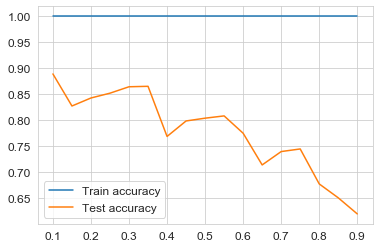

In [122]:
# To check for best test size

knn = DecisionTreeClassifier()

size = [0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9]
results = {}
for i in size: 
    
    X_train, X_test, y_train, y_test = train_test_split(df_data, df_target, test_size = i)
    knn.fit(X_train,y_train.values.ravel())
    
    test=knn.score(X_test,y_test)
    train=knn.score(X_train,y_train)
    
    results[i]=train,test

size_df=pd.DataFrame(results).transpose()
size_df.columns=['Train accuracy','Test accuracy']

size_df.plot()

In [123]:
# Splitting data into train and test set
X_train, X_test, y_train, y_test = train_test_split(df_data,df_target, test_size = 0.30, random_state=0)

In [124]:
X_train.shape

(756, 77)

In [125]:
X_test.shape

(324, 77)

In [126]:
from sklearn.tree import DecisionTreeClassifier 

In [127]:
# with no limit on tree size
clf = DecisionTreeClassifier()

#run the 6-fold cross validation
for k, (train_index, test_index) in enumerate(kf.split(df_data)):
 
    X_train, X_test = df_data.iloc[train_index], df_data.iloc[test_index]
    y_train, y_test = df_target.iloc[train_index], df_target.iloc[test_index]
     
    clf.fit(X_train, y_train)
    print("[fold {0}] score: {1:.5f}".format(k, clf.score(X_test, y_test)))

    # Average score: 0.863888

[fold 0] score: 0.88889
[fold 1] score: 0.84259
[fold 2] score: 0.84259
[fold 3] score: 0.90741
[fold 4] score: 0.83333
[fold 5] score: 0.86111
[fold 6] score: 0.92593
[fold 7] score: 0.88889
[fold 8] score: 0.83333
[fold 9] score: 0.85185


In [128]:
# Generating confusion matrix

clf = DecisionTreeClassifier()

fit = clf.fit(X_train, y_train)

y_pre = fit.predict(X_test)

cm = confusion_matrix(y_test, y_pre)

print(cm)
print(classification_report(y_test,y_pre))

[[ 8  0  0  0  0  1  0  0]
 [ 0 15  0  0  1  3  0  0]
 [ 1  0 16  1  0  0  3  0]
 [ 0  0  0 10  0  0  1  0]
 [ 0  1  0  0  9  0  0  0]
 [ 1  0  0  0  1 11  0  0]
 [ 0  0  2  1  0  0 14  0]
 [ 0  0  0  0  0  0  0  8]]
              precision    recall  f1-score   support

      c-CS-m       0.80      0.89      0.84         9
      c-CS-s       0.94      0.79      0.86        19
      c-SC-m       0.89      0.76      0.82        21
      c-SC-s       0.83      0.91      0.87        11
      t-CS-m       0.82      0.90      0.86        10
      t-CS-s       0.73      0.85      0.79        13
      t-SC-m       0.78      0.82      0.80        17
      t-SC-s       1.00      1.00      1.00         8

    accuracy                           0.84       108
   macro avg       0.85      0.86      0.85       108
weighted avg       0.85      0.84      0.84       108



In [106]:
clf = DecisionTreeClassifier(max_depth=5, min_samples_split=2, min_samples_leaf=4, max_leaf_nodes=None, max_features = 'auto')

#run the 6-fold cross validation
for k, (train_index, test_index) in enumerate(kf.split(df_data)):
 
    X_train, X_test = df_data.iloc[train_index], df_data.iloc[test_index]
    y_train, y_test = df_target.iloc[train_index], df_target.iloc[test_index]
     
    clf.fit(X_train, y_train)
    print("[fold {0}] score: {1:.5f}".format(k, clf.score(X_test, y_test)))

    # Average score: 0.637037

[fold 0] score: 0.62963
[fold 1] score: 0.49074
[fold 2] score: 0.58333
[fold 3] score: 0.47222
[fold 4] score: 0.63889
[fold 5] score: 0.65741
[fold 6] score: 0.62037
[fold 7] score: 0.50926
[fold 8] score: 0.55556
[fold 9] score: 0.65741


In [107]:
clf = DecisionTreeClassifier(max_depth=7, min_samples_split=2, min_samples_leaf=6, max_leaf_nodes=None, max_features = 'auto')

#run the KFlod cross validation
for k, (train_index, test_index) in enumerate(kf.split(df_data)):
 
    X_train, X_test = df_data.iloc[train_index], df_data.iloc[test_index]
    y_train, y_test = df_target.iloc[train_index], df_target.iloc[test_index]
     
    clf.fit(X_train, y_train)
    print("[fold {0}] score: {1:.5f}".format(k, clf.score(X_test, y_test)))
    
    # Average score: 0.708333

[fold 0] score: 0.71296
[fold 1] score: 0.62963
[fold 2] score: 0.61111
[fold 3] score: 0.65741
[fold 4] score: 0.72222
[fold 5] score: 0.69444
[fold 6] score: 0.69444
[fold 7] score: 0.66667
[fold 8] score: 0.66667
[fold 9] score: 0.68519


In [108]:
clf = DecisionTreeClassifier(max_depth=7, min_samples_split=6, min_samples_leaf=2, max_leaf_nodes=None, max_features = 'auto')

#run the KFlod cross validation
for k, (train_index, test_index) in enumerate(kf.split(df_data)):
 
    X_train, X_test = df_data.iloc[train_index], df_data.iloc[test_index]
    y_train, y_test = df_target.iloc[train_index], df_target.iloc[test_index]
     
    clf.fit(X_train, y_train)
    print("[fold {0}] score: {1:.5f}".format(k, clf.score(X_test, y_test)))
    
    # Average score: 0.754629

[fold 0] score: 0.72222
[fold 1] score: 0.69444
[fold 2] score: 0.68519
[fold 3] score: 0.66667
[fold 4] score: 0.80556
[fold 5] score: 0.70370
[fold 6] score: 0.73148
[fold 7] score: 0.67593
[fold 8] score: 0.76852
[fold 9] score: 0.77778


In [109]:
clf = DecisionTreeClassifier(min_samples_split=6, min_samples_leaf=2, max_leaf_nodes=None, max_features = 'auto')

#run the KFlod cross validation
for k, (train_index, test_index) in enumerate(kf.split(df_data)):
 
    X_train, X_test = df_data.iloc[train_index], df_data.iloc[test_index]
    y_train, y_test = df_target.iloc[train_index], df_target.iloc[test_index]
     
    clf.fit(X_train, y_train)
    print("[fold {0}] score: {1:.5f}".format(k, clf.score(X_test, y_test)))
    
    # Average score: 0.795369

[fold 0] score: 0.86111
[fold 1] score: 0.82407
[fold 2] score: 0.78704
[fold 3] score: 0.76852
[fold 4] score: 0.75000
[fold 5] score: 0.79630
[fold 6] score: 0.84259
[fold 7] score: 0.80556
[fold 8] score: 0.75926
[fold 9] score: 0.77778


In [110]:
clf = DecisionTreeClassifier(min_samples_split=6, min_samples_leaf=4, max_leaf_nodes=None, max_features = 'auto')

#run the KFlod cross validation
for k, (train_index, test_index) in enumerate(kf.split(df_data)):
 
    X_train, X_test = df_data.iloc[train_index], df_data.iloc[test_index]
    y_train, y_test = df_target.iloc[train_index], df_target.iloc[test_index]
     
    clf.fit(X_train, y_train)
    print("[fold {0}] score: {1:.5f}".format(k, clf.score(X_test, y_test)))
    
    # Average score: 0.777778

[fold 0] score: 0.83333
[fold 1] score: 0.82407
[fold 2] score: 0.75000
[fold 3] score: 0.74074
[fold 4] score: 0.77778
[fold 5] score: 0.74074
[fold 6] score: 0.76852
[fold 7] score: 0.80556
[fold 8] score: 0.75000
[fold 9] score: 0.80556


In [117]:
# Generating confusion matrix

clf = DecisionTreeClassifier(min_samples_split=6, min_samples_leaf=4, max_leaf_nodes=None, max_features = 'auto')

fit = clf.fit(X_train, y_train)

y_pre = fit.predict(X_test)

cm = confusion_matrix(y_test, y_pre)

print(cm)
print(classification_report(y_test,y_pre))

[[ 9  0  0  0  0  0  0  0]
 [ 2 16  0  0  1  0  0  0]
 [ 0  0 21  0  0  0  0  0]
 [ 0  0  0 11  0  0  0  0]
 [ 0  2  0  0  8  0  0  0]
 [ 2  2  0  0  0  9  0  0]
 [ 0  0  6  0  0  0 11  0]
 [ 0  0  0  1  0  0  2  5]]
              precision    recall  f1-score   support

      c-CS-m       0.69      1.00      0.82         9
      c-CS-s       0.80      0.84      0.82        19
      c-SC-m       0.78      1.00      0.88        21
      c-SC-s       0.92      1.00      0.96        11
      t-CS-m       0.89      0.80      0.84        10
      t-CS-s       1.00      0.69      0.82        13
      t-SC-m       0.85      0.65      0.73        17
      t-SC-s       1.00      0.62      0.77         8

    accuracy                           0.83       108
   macro avg       0.87      0.83      0.83       108
weighted avg       0.85      0.83      0.83       108



In [118]:
# To visualise Decision Tree
from sklearn import tree

In [119]:
df_data.feature_names = df_data.columns

In [120]:
df_target.target_names = ['c-CS-m', 'c-CS-s', 'c-SC-s', 'c-SC-m', 't-CS-s', 't-CS-m', 't-SC-s', 't-SC-m']

In [121]:
with open('mice_protein.dot', 'w') as f:
    f = tree.export_graphviz(clf, out_file= f, feature_names=df_data.feature_names, class_names=df_target.target_names, filled=True, rounded=True, special_characters=True)
